<a href="https://colab.research.google.com/github/prantoran/ai-prac/blob/master/Stock_Market_Analytics_Zoomcamp_2025/pinku_stock_markets_analytics_zoomcamp_2025_hw2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 2 Homework (2025 Cohort)

In this homework, we're going to combine data from various sources to process it in Pandas and generate additional fields.

If not stated otherwise, please use the [LINK](https://github.com/DataTalksClub/stock-markets-analytics-zoomcamp/blob/main/02-dataframe-analysis/%5B2025%5D_Module_02_Colab_Working_with_the_data.ipynb) covered at the livestream to re-use the code snippets.


In [251]:
!pip install yfinance

## Question 1: [IPO] Withdrawn IPOs by Company Type

**What is the total withdrawn IPO value (in $ millions) for the company class with the highest total withdrawal value?**

From the withdrawn IPO list ([stockanalysis.com/ipos/withdrawn](https://stockanalysis.com/ipos/withdrawn/)), collect and process the data to find out which company type saw the most withdrawn IPO value.

### Steps:


#### 1. Use `pandas.read_html()` with the URL above to load the IPO withdrawal table into a DataFrame.
   *It is a similar process to Code Snippet 1 discussed at the livestream.*    You should get **99 entries**.

In [252]:
import pandas as pd
import requests
from io import StringIO

In [253]:
def withdrawn_ipos():
  """
  Fetch IPO data for the given year from stockanalysis.com.
  """
  url = f"https://stockanalysis.com/ipos/withdrawn/"
  headers = {
      'User-Agent': (
          'Mozilla/5.0 (Windows NT 10.0; Win64; x64) '
          'AppleWebKit/537.36 (KHTML, like Gecko) '
          'Chrome/58.0.3029.110 Safari/537.3'
      )
  }

  try:
    response = requests.get(url, headers=headers, timeout=10)
    response.raise_for_status()

    # Wrap HTML text in StringIO to avoid deprecation warning
    # "Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object."
    html_io = StringIO(response.text)
    tables = pd.read_html(html_io)

    if not tables:
      raise ValueError(f"No tables found for withdrawn IPOs.")

    return tables[0]

  except requests.exceptions.RequestException as e:
    print(f"Request failed: {e}")
  except ValueError as ve:
    print(f"Data error: {ve}")
  except Exception as ex:
    print(f"Unexpected error: {ex}")

  return pd.DataFrame()

In [254]:
w = withdrawn_ipos()

In [255]:
w.head()

Symbol                Company Name    Price Range Shares Offered
0   ODTX  Odyssey Therapeutics, Inc.              -              -
1   UNFL      Unifoil Holdings, Inc.  $3.00 - $4.00        2000000
2   AURN        Aurion Biotech, Inc.              -              -
3   ROTR             PHI Group, Inc.              -              -
4    ONE           One Power Company              -              -

In [256]:
w.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Symbol          100 non-null    object
 1   Company Name    100 non-null    object
 2   Price Range     100 non-null    object
 3   Shares Offered  100 non-null    object
dtypes: object(4)
memory usage: 3.3+ KB


#### 2. Create a new column called `Company Class`, categorizing company names based on patterns like:
   - ‚ÄúAcquisition Corp‚Äù or ‚ÄúAcquisition Corporation‚Äù ‚Üí `Acq.Corp`
   - ‚ÄúInc‚Äù or ‚ÄúIncorporated‚Äù ‚Üí `Inc`
   - ‚ÄúGroup‚Äù ‚Üí `Group`
   - ‚ÄúLtd‚Äù or ‚ÄúLimited‚Äù ‚Üí `Limited`
   - ‚ÄúHoldings‚Äù ‚Üí `Holdings`
   - Others ‚Üí `Other`

  *  Order: Please follow the listed order of classes and assign the first matched value (e.g., for 'shenni holdings limited', you assign the 'Limited' class).

  * Hint: make your function more robust by converting names to lowercase and splitting into words before matching patterns.

In [257]:
company_classes = ['Acq.Corp', 'Inc', 'Group', 'Limited', 'Holdings', 'Other']

company_mappings = {
    'acquisition corp': 0,
    'acquisition corporation': 0,
    'inc': 1,
    'incorporated': 1,
    'group': 2,
    'ltd': 3,
    'limited': 3,
    'holdings': 4,
    'others': 5
}

def find_company_class(company_name: str) -> str:
  s = company_name.lower()
  for key, value in company_mappings.items():
    if key in s:
      return company_classes[value]
  return 'Other'

In [258]:
company_class = 'Company Class'
w[company_class] = w['Company Name'].apply(lambda x: find_company_class(x))
w.head()

Symbol                Company Name    Price Range Shares Offered  \
0   ODTX  Odyssey Therapeutics, Inc.              -              -   
1   UNFL      Unifoil Holdings, Inc.  $3.00 - $4.00        2000000   
2   AURN        Aurion Biotech, Inc.              -              -   
3   ROTR             PHI Group, Inc.              -              -   
4    ONE           One Power Company              -              -   

  Company Class  
0           Inc  
1           Inc  
2           Inc  
3           Inc  
4         Other

#### 3. Define a new field `Avg. price` by parsing the `Price Range` field (create a function and apply it to the `Price Range` column). Examples:
   - '$8.00-$10.00' ‚Üí `9.0`  
   - '$5.00' ‚Üí `5.0`  
   - '-' ‚Üí `None`

In [259]:
avg_price_key = 'Avg. price'

In [260]:
def calc_avg_price(price_range: str) -> float:
  if price_range == '-':
    return None
  w = price_range.split('-')
  if len(w) == 1:
    return float(w[0].replace('$', ''))
  return (float(w[0].replace('$', '')) + float(w[1].replace('$', ''))) / 2

In [261]:
w[avg_price_key] = w['Price Range'].apply(lambda x: calc_avg_price(x))
w.head()

Symbol                Company Name    Price Range Shares Offered  \
0   ODTX  Odyssey Therapeutics, Inc.              -              -   
1   UNFL      Unifoil Holdings, Inc.  $3.00 - $4.00        2000000   
2   AURN        Aurion Biotech, Inc.              -              -   
3   ROTR             PHI Group, Inc.              -              -   
4    ONE           One Power Company              -              -   

  Company Class  Avg. price  
0           Inc         NaN  
1           Inc         3.5  
2           Inc         NaN  
3           Inc         NaN  
4         Other         NaN

#### 4. Convert `Shares Offered` to numeric, clean missing or invalid values.


In [262]:
w['Shares Offered'] = pd.to_numeric(w['Shares Offered'], errors='coerce')
w.head()

Symbol                Company Name    Price Range  Shares Offered  \
0   ODTX  Odyssey Therapeutics, Inc.              -             NaN   
1   UNFL      Unifoil Holdings, Inc.  $3.00 - $4.00       2000000.0   
2   AURN        Aurion Biotech, Inc.              -             NaN   
3   ROTR             PHI Group, Inc.              -             NaN   
4    ONE           One Power Company              -             NaN   

  Company Class  Avg. price  
0           Inc         NaN  
1           Inc         3.5  
2           Inc         NaN  
3           Inc         NaN  
4         Other         NaN

In [263]:
w = w[w['Shares Offered'].notna()]
w.head()

Symbol                                       Company Name     Price Range  \
1   UNFL                             Unifoil Holdings, Inc.   $3.00 - $4.00   
5   HPOT  The Great Restaurant Development Holdings Limited   $4.00 - $6.00   
6   CABR                                Caring Brands, Inc.           $4.00   
7   SQVI                             Sequoia Vaccines, Inc.  $8.00 - $10.00   
8    SNI                            Shenni Holdings Limited   $4.00 - $6.00   

   Shares Offered Company Class  Avg. price  
1       2000000.0           Inc         3.5  
5       1400000.0       Limited         5.0  
6        750000.0           Inc         4.0  
7       2775000.0           Inc         9.0  
8       3000000.0       Limited         5.0

In [264]:
w.info()

<class 'pandas.core.frame.DataFrame'>
Index: 72 entries, 1 to 99
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Symbol          72 non-null     object 
 1   Company Name    72 non-null     object 
 2   Price Range     72 non-null     object 
 3   Shares Offered  72 non-null     float64
 4   Company Class   72 non-null     object 
 5   Avg. price      71 non-null     float64
dtypes: float64(2), object(4)
memory usage: 3.9+ KB


#### 5. Create a new column:  
`Withdrawn Value = Shares Offered * Avg Price` (**71 non-null values**)

In [265]:
withdrawn_value_key = 'Withdrawn Value'
w[withdrawn_value_key] = w['Shares Offered'] * w[avg_price_key]
w.head()

Symbol                                       Company Name     Price Range  \
1   UNFL                             Unifoil Holdings, Inc.   $3.00 - $4.00   
5   HPOT  The Great Restaurant Development Holdings Limited   $4.00 - $6.00   
6   CABR                                Caring Brands, Inc.           $4.00   
7   SQVI                             Sequoia Vaccines, Inc.  $8.00 - $10.00   
8    SNI                            Shenni Holdings Limited   $4.00 - $6.00   

   Shares Offered Company Class  Avg. price  Withdrawn Value  
1       2000000.0           Inc         3.5        7000000.0  
5       1400000.0       Limited         5.0        7000000.0  
6        750000.0           Inc         4.0        3000000.0  
7       2775000.0           Inc         9.0       24975000.0  
8       3000000.0       Limited         5.0       15000000.0

#### 6. Group by `Company Class` and calculate total withdrawn value.


In [266]:
w.groupby(company_class)[withdrawn_value_key].sum()

Company Class
Acq.Corp    4.021000e+09
Group       3.378750e+07
Holdings    7.500000e+07
Inc         2.257164e+09
Limited     5.497346e+08
Other       7.679200e+08
Name: Withdrawn Value, dtype: float64

## Question 2:   [IPO] Median Sharpe Ratio for 2024 IPOs (First 5 Months)


**What is the median Sharpe ratio (as of 6 June 2025) for companies that went public in the first 5 months of 2024?**

The goal is to replicate the large-scale `yfinance` OHLCV data download and perform basic financial calculations on IPO stocks.


### Steps:


#### 1. Using the same approach as in Question 1, download the IPOs in 2024 from:  
   [https://stockanalysis.com/ipos/2024/](https://stockanalysis.com/ipos/2024/)  
   Filter to keep only those IPOs **before 1 June 2024** (first 5 months of 2024).  
   ‚û§ You should have **75 tickers**.

In [267]:
import pandas as pd
import requests
from io import StringIO

In [268]:
def ipos_2024():
  """
  Fetch IPO data for the given year from stockanalysis.com.
  """
  url = f"https://stockanalysis.com/ipos/2024/"
  headers = {
      'User-Agent': (
          'Mozilla/5.0 (Windows NT 10.0; Win64; x64) '
          'AppleWebKit/537.36 (KHTML, like Gecko) '
          'Chrome/58.0.3029.110 Safari/537.3'
      )
  }

  try:
    response = requests.get(url, headers=headers, timeout=10)
    response.raise_for_status()

    # Wrap HTML text in StringIO to avoid deprecation warning
    # "Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object."
    html_io = StringIO(response.text)
    tables = pd.read_html(html_io)

    if not tables:
      raise ValueError(f"No tables found for withdrawn IPOs.")

    df = tables[0]
    df['Month'] = pd.to_datetime(df['IPO Date']).dt.month
    df = df[df['Month'] < 6]
    return df

  except requests.exceptions.RequestException as e:
    print(f"Request failed: {e}")
  except ValueError as ve:
    print(f"Data error: {ve}")
  except Exception as ex:
    print(f"Unexpected error: {ex}")

  return pd.DataFrame()

In [269]:
ipos_2024_df = ipos_2024()
ipos_2024_df.head()

IPO Date Symbol                         Company Name IPO Price  \
148  May 31, 2024   NAKA                      Kindly MD, Inc.         -   
149  May 23, 2024    BOW      Bowhead Specialty Holdings Inc.    $17.00   
150  May 17, 2024    HDL  Super Hi International Holding Ltd.    $19.56   
151  May 17, 2024   RFAI               RF Acquisition Corp II    $10.00   
152  May 15, 2024   JDZG                        JIADE Limited     $4.00   

    Current   Return  Month  
148  $16.30        -      5  
149  $37.25  119.12%      5  
150  $18.70   -4.40%      5  
151  $10.59    5.90%      5  
152   $0.26  -93.50%      5

In [270]:
ipos_2024_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 77 entries, 148 to 224
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   IPO Date      77 non-null     object
 1   Symbol        77 non-null     object
 2   Company Name  77 non-null     object
 3   IPO Price     77 non-null     object
 4   Current       77 non-null     object
 5   Return        77 non-null     object
 6   Month         77 non-null     int32 
dtypes: int32(1), object(6)
memory usage: 4.5+ KB


#### 2.  Use **Code Snippet 7** to download daily stock data for those tickers (via `yfinance`).  
   Make sure you understand how `growth_1d` ... `growth_365d`, and volatility columns are defined.  
   Define a new column `growth_252d` representing growth after **252 trading days** (~1 year), in addition to any other growth periods you already track.


In [271]:
ALL_TICKERS = ipos_2024_df['Symbol'].tolist()

In [272]:


import time
import yfinance as yf
import numpy as np
import pandas as pd

stocks_df = pd.DataFrame({'A' : []})

for i,ticker in enumerate(ALL_TICKERS):
  print(i,ticker)

  # Work with stock prices
  ticker_obj = yf.Ticker(ticker)

  # historyPrices = yf.download(tickers = ticker,
  #                    period = "max",
  #                    interval = "1d")
  historyPrices = ticker_obj.history(
                     period = "max",
                     interval = "1d")

  # generate features for historical prices, and what we want to predict
  historyPrices['Ticker'] = ticker
  historyPrices['Year']= historyPrices.index.year
  historyPrices['Month'] = historyPrices.index.month
  historyPrices['Weekday'] = historyPrices.index.weekday
  historyPrices['Date'] = historyPrices.index.date

  # historical returns
  for i in [1,3,7,30,90,252,365]:
    historyPrices['growth_'+str(i)+'d'] = historyPrices['Close'] / historyPrices['Close'].shift(i)
  historyPrices['growth_future_30d'] = historyPrices['Close'].shift(-30) / historyPrices['Close']

  # Technical indicators
  # SimpleMovingAverage 10 days and 20 days
  historyPrices['SMA10']= historyPrices['Close'].rolling(10).mean()
  historyPrices['SMA20']= historyPrices['Close'].rolling(20).mean()
  historyPrices['growing_moving_average'] = np.where(historyPrices['SMA10'] > historyPrices['SMA20'], 1, 0)
  historyPrices['high_minus_low_relative'] = (historyPrices.High - historyPrices.Low) / historyPrices['Close']

  # 30d rolling volatility : https://ycharts.com/glossary/terms/rolling_vol_30
  historyPrices['volatility'] =   historyPrices['Close'].rolling(30).std() * np.sqrt(252)

  # what we want to predict
  historyPrices['is_positive_growth_30d_future'] = np.where(historyPrices['growth_future_30d'] > 1, 1, 0)

  # sleep 1 sec between downloads - not to overload the API server
  time.sleep(1)


  if stocks_df.empty:
    stocks_df = historyPrices
  else:
    stocks_df = pd.concat([stocks_df, historyPrices], ignore_index=True)



0 NAKA
1 BOW
2 HDL
3 RFAI
4 JDZG
5 RAY
6 BTOC
7 ZK
8 GPAT
9 PAL
10 SVCO
11 NNE
12 CCIX
13 VIK
14 ZONE
15 LOAR
16 MRX
17 RBRK
18 NCI
19 MFI
20 YYGH
21 TRSG
22 CDTG
23 CTRI
24 IBTA
25 MTEN
26 SUPX
27 TWG
28 ULS
29 PACS
30 MNDR
31 CTNM
32 MAMO
33 ZBAO
34 BOLD
35 MMA
36 UBXG
37 IBAC
38 AUNA
39 BKHA
40 LOBO
41 RDDT
42 ALAB
43 INTJ
44 RYDE
45 LGCL
46 SMXT
47 VHAI
48 DYCQ
49 CHRO
50 UMAC
51 HLXB
52 MGX
53 TBBB
54 TELO
55 KYTX
56 PMNT
57 AHR
58 LEGT
59 ANRO
60 GUTS
61 AS
62 FBLG
63 AVBP
64 BTSG
65 HAO
66 CGON
67 YIBO
68 JL
69 SUGP
70 JVSA
71 KSPI
72 CCTG
73 PSBD
74 SYNX
75 SDHC
76 ROMA


#### 3. Calculate the Sharpe ratio assuming a risk-free rate of **4.5%**:

   ```python
   stocks_df['Sharpe'] = (stocks_df['growth_252d'] - 0.045) / stocks_df['volatility']
   ```

In [273]:
stocks_df['Sharpe'] = (stocks_df['growth_252d'] - 0.045) / stocks_df['volatility']

#### 4. Filter the DataFrame to keep data only for the trading day:  
   **‚Äò2025-06-06‚Äô**

   Compute descriptive statistics (e.g., `.describe()`) for these columns:  
   - `growth_252d`  
   - `Sharpe`

   You should observe:  
   - `growth_252d` is defined for **71 out of 75 stocks** (some IPOs are too recent or data starts later).  
   - Median `growth_252d` is approximately **0.75** (indicating a 25% decline), while mean is about **1.15**, showing a bias towards high-growth companies pushing the average up.

In [274]:
stocks_df.Date = pd.to_datetime(stocks_df.Date, format='mixed')

In [275]:
sharpe_df = stocks_df[stocks_df['Date'] == '2025-06-06']

In [276]:
sharpe_df['growth_252d'].median()

0.7631877801587481

In [277]:
sharpe_df['growth_252d'].mean()

np.float64(1.2279479464506708)

#### 5. **Answer:**  
   - What is the **median Sharpe ratio** for these 71 stocks?  
   - Note: Positive `Sharpe` means growth exceeding the risk-free rate of 4.5%.  
   - [Additional] Do you observe the **same top 10 companies** when sorting by `growth_252d` versus sorting by `Sharpe`?

In [278]:
sharpe_df['Sharpe'].median()

0.08376823003294499

In [279]:
sharpe_df['Sharpe'].mean()

np.float64(0.28457624123033315)

In [280]:
sharpe_df.sort_values(by='growth_252d', ascending=False).head(10)

Open        High        Low      Close    Volume  Dividends  \
21112    5.310000    5.355000   5.289000   5.320000      7700        0.0   
23946    3.650000    3.950000   3.630000   3.700000     84400        0.0   
254     16.260000   17.200001  15.550000  15.880000    431200        0.0   
14900    6.810000    8.650000   6.610000   7.420000  10186200        0.0   
3233    29.150000   31.559000  28.350000  31.190001   3244100        0.0   
4929   102.800003  103.000000  95.000000  97.910004   6569700        0.0   
17297   35.070000   35.580002  34.755001  35.480000   1715900        0.0   
18648   37.540001   37.799999  37.009998  37.520000   4036300        0.0   
7573    10.470000   10.470000  10.120000  10.135000     51200        0.0   
4639    43.009998   43.020000  42.126999  42.270000    460000        0.0   

       Stock Splits Ticker  Year  Month  ...  growth_252d growth_365d  \
21112           0.0     JL  2025      6  ...     8.097413         NaN   
23946           0.0   ROMA  2025      6  ...     6.156406         NaN   
254             0.0   NAKA  2025      6  ...     5.438356         NaN   
14900           0.0   UMAC  2025      6  ...     4.966533         NaN   
3233            0.0    NNE  2025      6  ...     4.655224         NaN   
4929            0.0   RBRK  2025      6  ...     3.184065         NaN   
17297           0.0    AHR  2025      6  ...     2.483097         NaN   
18648           0.0     AS  2025      6  ...     2.478203         NaN   
7573            0.0   SUPX  2025      6  ...     2.346065         NaN   
4639            0.0    MRX  2025      6  ...     2.300384         NaN   

       growth_future_30d      SMA10      SMA20  growing_moving_average  \
21112                NaN   5.303000   4.734600                       1   
23946                NaN   3.207100   2.625550                       1   
254                  NaN  20.561000  17.248000                       1   
14900                NaN   5.861000   5.567000                       1   
3233                 NaN  31.332000  28.784500                       1   
4929                 NaN  96.484999  90.673499                       1   
17297                NaN  34.840000  34.803500                       1   
18648                NaN  37.290000  34.883000                       1   
7573                 NaN  10.706200  10.842350                       0   
4639                 NaN  43.383000  44.608613                       0   

       high_minus_low_relative  volatility  is_positive_growth_30d_future  \
21112                 0.012406   14.221305                              0   
23946                 0.086486   12.553202                              0   
254                   0.103904  136.860031                              0   
14900                 0.274933   11.681615                              0   
3233                  0.102886   57.122852                              0   
4929                  0.081708  164.768721                              0   
17297                 0.023253   21.657313                              0   
18648                 0.021055   86.819697                              0   
7573                  0.034534    8.637976                              0   
4639                  0.021126   29.466621                              0   

         Sharpe  
21112  0.566222  
23946  0.486840  
254    0.039408  
14900  0.421306  
3233   0.080707  
4929   0.019051  
17297  0.112576  
18648  0.028026  
7573   0.266389  
4639   0.076540  

[10 rows x 27 columns]

In [281]:
sharpe_df.sort_values(by='Sharpe', ascending=False).head(10)

Open    High     Low   Close  Volume  Dividends  Stock Splits Ticker  \
11491  10.600  10.600  10.600  10.600       0        0.0           0.0   BKHA   
21788  10.850  10.850  10.850  10.850  228100        0.0           0.0   JVSA   
17606  10.620  10.620  10.620  10.620       0        0.0           0.0   LEGT   
10900  10.420  10.420  10.420  10.420     100        0.0           0.0   IBAC   
15242  10.800  10.890  10.750  10.890  383400        0.0           0.0   HLXB   
8769    1.310   1.350   1.300   1.340   51800        0.0           0.0   MNDR   
14224  10.780  10.820  10.780  10.800    2500        0.0           0.0   DYCQ   
12748   0.633   0.670   0.605   0.668   31400        0.0           0.0   INTJ   
21112   5.310   5.355   5.289   5.320    7700        0.0           0.0     JL   
6101    1.780   1.820   1.729   1.790    6700        0.0           0.0   TRSG   

       Year  Month  ...  growth_252d growth_365d  growth_future_30d    SMA10  \
11491  2025      6  ...     1.045881         NaN                NaN  10.5980   
21788  2025      6  ...     1.071076         NaN                NaN  10.8180   
17606  2025      6  ...     1.049407         NaN                NaN  10.6251   
10900  2025      6  ...     1.044611         NaN                NaN  10.4425   
15242  2025      6  ...     1.061404         NaN                NaN  10.8210   
8769   2025      6  ...     1.030769         NaN                NaN   1.3720   
14224  2025      6  ...     1.059863         NaN                NaN  10.7260   
12748  2025      6  ...     0.661386         NaN                NaN   0.6126   
21112  2025      6  ...     8.097413         NaN                NaN   5.3030   
6101   2025      6  ...     0.646209         NaN                NaN   1.8504   

          SMA20  growing_moving_average  high_minus_low_relative  volatility  \
11491  10.59750                       1                 0.000000    0.352961   
21788  10.80500                       1                 0.000000    0.502601   
17606  10.63190                       0                 0.000000    0.517665   
10900  10.41875                       1                 0.000000    0.610592   
15242  10.83250                       0                 0.012856    0.904682   
8769    1.36300                       1                 0.037313    1.011840   
14224  10.73900                       0                 0.003704    1.046983   
12748   0.59675                       1                 0.097305    0.827906   
21112   4.73460                       1                 0.012406   14.221305   
6101    1.85700                       0                 0.050838    1.160458   

       is_positive_growth_30d_future    Sharpe  
11491                              0  2.835668  
21788                              0  2.041531  
17606                              0  1.940267  
10900                              0  1.637119  
15242                              0  1.123493  
8769                               0  0.974234  
14224                              0  0.969321  
12748                              0  0.744512  
21112                              0  0.566222  
6101                               0  0.518080  

[10 rows x 27 columns]

## Question 3: [IPO] ‚ÄòFixed Months Holding Strategy‚Äô

What is the optimal number of months (1 to 12) to hold a newly IPO'd stock in order to maximize average growth?
(Assume you buy at the close of the first trading day and sell after a fixed number of trading days.)

Goal:
Investigate whether holding an IPO stock for a fixed number of months after its first trading day produces better returns, using future growth columns.

Steps:

### 1. Start from the existing DataFrame from Question 2 (75 tickers from IPOs in the first 5 months of 2024).

Add 12 new columns:

future_growth_1m, future_growth_2m, ..., future_growth_12m
(Assume 1 month = 21 trading days, so growth is calculated over 21, 42, ..., 252 trading days)

This logic is similar to historyPrices['growth_future_30d'] from Code Snippet 7, but extended to longer timeframes.

In [282]:
stocks_df = pd.DataFrame({'A' : []})

for i,ticker in enumerate(ALL_TICKERS):
  print(i,ticker)

  # Work with stock prices
  ticker_obj = yf.Ticker(ticker)

  # historyPrices = yf.download(tickers = ticker,
  #                    period = "max",
  #                    interval = "1d")
  historyPrices = ticker_obj.history(
                     period = "max",
                     interval = "1d")

  # generate features for historical prices, and what we want to predict
  historyPrices['Ticker'] = ticker
  historyPrices['Year']= historyPrices.index.year
  historyPrices['Month'] = historyPrices.index.month
  historyPrices['Weekday'] = historyPrices.index.weekday
  historyPrices['Date'] = historyPrices.index.date

  # historical returns
  for i in [1,3,7,30,90,252,365]:
    historyPrices['growth_'+str(i)+'d'] = historyPrices['Close'] / historyPrices['Close'].shift(i)
  historyPrices['growth_future_30d'] = historyPrices['Close'].shift(-30) / historyPrices['Close']

  # Technical indicators
  # SimpleMovingAverage 10 days and 20 days
  historyPrices['SMA10']= historyPrices['Close'].rolling(10).mean()
  historyPrices['SMA20']= historyPrices['Close'].rolling(20).mean()
  historyPrices['growing_moving_average'] = np.where(historyPrices['SMA10'] > historyPrices['SMA20'], 1, 0)
  historyPrices['high_minus_low_relative'] = (historyPrices.High - historyPrices.Low) / historyPrices['Close']

  # 30d rolling volatility : https://ycharts.com/glossary/terms/rolling_vol_30
  historyPrices['volatility'] =   historyPrices['Close'].rolling(30).std() * np.sqrt(252)

  # what we want to predict
  historyPrices['is_positive_growth_30d_future'] = np.where(historyPrices['growth_future_30d'] > 1, 1, 0)

  for i in range(1,13):
    historyPrices['future_growth_'+str(i)+'m'] = historyPrices['Close'].shift(-i*21) / historyPrices['Close']
  # sleep 1 sec between downloads - not to overload the API server
  time.sleep(1)


  if stocks_df.empty:
    stocks_df = historyPrices
  else:
    stocks_df = pd.concat([stocks_df, historyPrices], ignore_index=True)

stocks_df['Sharpe'] = (stocks_df['growth_252d'] - 0.045) / stocks_df['volatility']


0 NAKA
1 BOW
2 HDL
3 RFAI
4 JDZG
5 RAY
6 BTOC
7 ZK
8 GPAT
9 PAL
10 SVCO
11 NNE
12 CCIX
13 VIK
14 ZONE
15 LOAR
16 MRX
17 RBRK
18 NCI
19 MFI
20 YYGH
21 TRSG
22 CDTG
23 CTRI
24 IBTA
25 MTEN
26 SUPX
27 TWG
28 ULS
29 PACS
30 MNDR
31 CTNM
32 MAMO
33 ZBAO
34 BOLD
35 MMA
36 UBXG
37 IBAC
38 AUNA
39 BKHA
40 LOBO
41 RDDT
42 ALAB
43 INTJ
44 RYDE
45 LGCL
46 SMXT
47 VHAI
48 DYCQ
49 CHRO
50 UMAC
51 HLXB
52 MGX
53 TBBB
54 TELO
55 KYTX
56 PMNT
57 AHR
58 LEGT
59 ANRO
60 GUTS
61 AS
62 FBLG
63 AVBP
64 BTSG
65 HAO
66 CGON
67 YIBO
68 JL
69 SUGP
70 JVSA
71 KSPI
72 CCTG
73 PSBD
74 SYNX
75 SDHC
76 ROMA


In [283]:
stocks_df = stocks_df[stocks_df['Month'] < 6]

In [284]:
stocks_df.head(1).T

0
Open                                  4.0
High                                  4.2
Low                                   2.8
Close                                3.02
Volume                             440600
Dividends                             0.0
Stock Splits                          0.0
Ticker                               NAKA
Year                                 2024
Month                                   5
Weekday                                 4
Date                           2024-05-31
growth_1d                             NaN
growth_3d                             NaN
growth_7d                             NaN
growth_30d                            NaN
growth_90d                            NaN
growth_252d                           NaN
growth_365d                           NaN
growth_future_30d                0.784768
SMA10                                 NaN
SMA20                                 NaN
growing_moving_average                  0
high_minus_low_relative          0.463576
volatility                            NaN
is_positive_growth_30d_future           0
future_growth_1m                 0.728477
future_growth_2m                  0.55298
future_growth_3m                 0.397351
future_growth_4m                 0.350993
future_growth_5m                  0.34106
future_growth_6m                 0.387417
future_growth_7m                 0.410596
future_growth_8m                 0.397351
future_growth_9m                 0.586093
future_growth_10m                0.516556
future_growth_11m                0.897351
future_growth_12m                5.672185
Sharpe                                NaN

### 2. **Determine the first trading day** (`min_date`) for each ticker.  


   This is the earliest date in the data for each stock.

In [285]:
min_date_df = stocks_df[['Ticker', 'Date']].groupby(['Ticker']).min()
min_date_df

Date
Ticker            
AHR     2024-02-07
ALAB    2024-03-20
ANRO    2024-02-02
AS      2024-02-01
AUNA    2024-03-22
...            ...
YIBO    2024-01-25
YYGH    2024-04-22
ZBAO    2024-04-02
ZK      2024-05-10
ZONE    2024-04-26

[77 rows x 1 columns]

### 3. **Join the data**:  
Perform an **inner join** between the `min_date` DataFrame and the future growth data on both `ticker` and `date`.  
‚û§ You should end up with **75 records** (one per IPO) with all 12 `future_growth_...` fields populated.

In [286]:
future_growth_columns = ['future_growth_'+str(i)+'m' for i in range(1, 13)]
growth_data_first_day = stocks_df.merge(min_date_df, on=['Ticker', 'Date'], how='inner')
growth_data_first_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 39 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Open                           77 non-null     float64
 1   High                           77 non-null     float64
 2   Low                            77 non-null     float64
 3   Close                          77 non-null     float64
 4   Volume                         77 non-null     int64  
 5   Dividends                      77 non-null     float64
 6   Stock Splits                   77 non-null     float64
 7   Ticker                         77 non-null     object 
 8   Year                           77 non-null     int32  
 9   Month                          77 non-null     int32  
 10  Weekday                        77 non-null     int32  
 11  Date                           77 non-null     object 
 12  growth_1d                      4 non-null      float

In [287]:
growth_data_first_day

Open       High        Low      Close   Volume  Dividends  \
0    4.000000   4.200000   2.800000   3.020000   440600        0.0   
1   23.000000  24.270000  22.139999  23.799999  3335800        0.0   
2   27.000000  30.000000  19.799999  22.290001   670000        0.0   
3   10.220000  10.220000  10.220000  10.220000    98400        0.0   
4    4.800000   5.400000   3.595000   4.070000  2366200        0.0   
..        ...        ...        ...        ...      ...        ...   
72   5.750000   9.833000   5.030000   7.700000  5181000        0.0   
73  14.039482  14.220914  13.832130  13.987644  1044800        0.0   
74   3.990000   4.000000   3.260000   3.610000   711400        0.0   
75  23.820000  24.670000  23.500000  24.150000   426100        0.0   
76  10.000000  11.800000   2.900000   2.900000  4601100        0.0   

    Stock Splits Ticker  Year  Month  ...  future_growth_4m future_growth_5m  \
0            0.0   NAKA  2024      5  ...          0.350993         0.341060   
1            0.0    BOW  2024      5  ...          1.167647         1.239076   
2            0.0    HDL  2024      5  ...          0.643786         0.720502   
3            0.0   RFAI  2025      1  ...          1.022505         1.028376   
4            0.0   JDZG  2024      5  ...          0.160442         0.272727   
..           ...    ...   ...    ...  ...               ...              ...   
72           0.0   CCTG  2024      1  ...          0.316883         0.279221   
73           0.0   PSBD  2024      1  ...          1.060584         1.061857   
74           0.0   SYNX  2024      1  ...          0.664820         0.753463   
75           0.0   SDHC  2024      1  ...          1.209938         1.036025   
76           0.0   ROMA  2024      1  ...          0.261724         0.167241   

    future_growth_6m  future_growth_7m  future_growth_8m  future_growth_9m  \
0           0.387417          0.410596          0.397351          0.586093   
1           1.461765          1.443698          1.357983          1.389076   
2           0.719605          1.255271          1.106326          1.030507   
3                NaN               NaN               NaN               NaN   
4           0.199017          0.139066          0.182555          0.170025   
..               ...               ...               ...               ...   
72          0.290909          0.206494          0.225974          0.232468   
73          1.081292          1.066809          1.074739          1.096368   
74          0.761773          0.844875          0.844875          0.822715   
75          1.130849          1.426915          1.484886          1.548654   
76          0.203448          0.190345          0.191379          0.317241   

    future_growth_10m  future_growth_11m  future_growth_12m  Sharpe  
0            0.516556           0.897351           5.672185     NaN  
1            1.722689           1.698319           1.533613     NaN  
2            1.192014           0.907133           1.002602     NaN  
3                 NaN                NaN                NaN     NaN  
4            0.146437           0.121867           0.142506     NaN  
..                ...                ...                ...     ...  
72           0.196104           0.198701           0.228571     NaN  
73           1.063983           1.060609           1.095498     NaN  
74           0.767313           0.825485           1.177285     NaN  
75           1.285714           1.340373           1.024017     NaN  
76           0.331379           0.300000           0.225862     NaN  

[77 rows x 39 columns]

### 4. **Compute descriptive statistics** for the resulting DataFrame:  
Use `.describe()` or similar to analyze each of the 12 columns:  
- `future_growth_1m`  
- `future_growth_2m`  
- ...  
- `future_growth_12m`

In [288]:
growth_data_first_day[future_growth_columns].describe().T

count      mean       std       min       25%       50%  \
future_growth_1m    77.0  0.933317  0.338013  0.098947  0.782732  0.977000   
future_growth_2m    77.0  0.934170  0.571808  0.073800  0.680193  1.000000   
future_growth_3m    77.0  0.831506  0.414872  0.060947  0.508139  0.927500   
future_growth_4m    77.0  0.820135  0.407245  0.045368  0.515385  0.909091   
future_growth_5m    77.0  0.800903  0.490725  0.054109  0.445378  0.821092   
future_growth_6m    73.0  0.867432  0.661048  0.061432  0.387417  0.782463   
future_growth_7m    73.0  0.849018  0.719645  0.044086  0.324100  0.840000   
future_growth_8m    73.0  0.832196  0.768259  0.050746  0.225974  0.770270   
future_growth_9m    73.0  0.883388  0.944928  0.033144  0.232468  0.735931   
future_growth_10m   73.0  0.907403  0.918477  0.037769  0.239394  0.665816   
future_growth_11m   73.0  0.888902  0.876526  0.023674  0.262500  0.715658   
future_growth_12m   73.0  0.990928  1.062204  0.038947  0.229851  0.710647   

                        75%       max  
future_growth_1m   1.047796  2.646505  
future_growth_2m   1.139076  4.874759  
future_growth_3m   1.075676  2.040000  
future_growth_4m   1.125316  1.605000  
future_growth_5m   1.033981  3.213873  
future_growth_6m   1.130849  3.670520  
future_growth_7m   1.158009  5.122350  
future_growth_8m   1.090127  5.171484  
future_growth_9m   1.037624  6.764933  
future_growth_10m  1.203716  5.352601  
future_growth_11m  1.326165  4.445545  
future_growth_12m  1.189424  5.672185

### 5. **Determine the best holding period**:  
- Find the number of months **(1 to 12)** where the **average (mean)** future growth is **maximal**.  
- This optimal month shows an uplift of **>1%** compared to all others.  
- Still, the average return remains **less than 1** (i.e., expected return is less than doubling your investment).



## Question 4: [Strategy] Simple RSI-Based Trading Strategy


**What is the total profit (in $thousands) you would have earned by investing $1000 every time a stock was oversold (RSI < 25)?**

### Goal:
Apply a simple rule-based trading strategy using the **Relative Strength Index (RSI)** technical indicator to identify oversold signals and calculate profits.

### Steps:

### 1. **Run the full notebook from Lecture 2 (33 stocks)**  
   - Ensure you can generate the merged DataFrame containing:  
     - OHLCV data  
     - Technical indicators  
     - Macro indicators  
   - Focus on getting **RSI** computed using **Code Snippets 8 and 9**.  
   - This process is essential and will help during the capstone project.

In [289]:
m16.info()

<class 'pandas.core.frame.DataFrame'>
Index: 230448 entries, 0 to 5707
Columns: 203 entries, Open to growth_btc_usd_365d
dtypes: datetime64[ns](3), float64(129), int32(64), int64(5), object(2)
memory usage: 302.4+ MB


In [291]:
m16['rsi']

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
5703    53.791785
5704    56.464125
5705    61.471431
5706    49.688854
5707    57.517365
Name: rsi, Length: 230448, dtype: float64

### 2. ‚ö†Ô∏è **IMPORTANT** Please use this file to solve the Home Assignment (**all next steps**)

Download precomputed data using this snippet:

   ```python
   import gdown
   import pandas as pd

   file_id = "1grCTCzMZKY5sJRtdbLVCXg8JXA8VPyg-"
   gdown.download(f"https://drive.google.com/uc?id={file_id}", "data.parquet", quiet=False)
   df = pd.read_parquet("data.parquet", engine="pyarrow")
   ```

In [292]:
import gdown
import pandas as pd

file_id = "1grCTCzMZKY5sJRtdbLVCXg8JXA8VPyg-"
gdown.download(f"https://drive.google.com/uc?id={file_id}", "data.parquet", quiet=False)
df = pd.read_parquet("data.parquet", engine="pyarrow")

Downloading...
From (original): https://drive.google.com/uc?id=1grCTCzMZKY5sJRtdbLVCXg8JXA8VPyg-
From (redirected): https://drive.google.com/uc?id=1grCTCzMZKY5sJRtdbLVCXg8JXA8VPyg-&confirm=t&uuid=c0fd2e3f-d568-4ed5-9ef5-21a12e03f903
To: /content/data.parquet
100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 130M/130M [00:04<00:00, 29.0MB/s]


### 3. **RSI Strategy Setup:**  
- RSI is already available in the dataset as a field.  
- The threshold for **oversold** is defined as `RSI < 25`.

In [295]:
df['rsi']

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
5686    68.312972
5687    67.123448
5688    67.563912
5689    68.218963
5690    69.670158
Name: rsi, Length: 229932, dtype: float64

### 4. **Filter the dataset by RSI and date:**  
```python

rsi_threshold = 25
selected_df = df[
    (df['rsi'] < rsi_threshold) &
    (df['Date'] >= '2000-01-01') &
    (df['Date'] <= '2025-06-01')
]
```

In [296]:
rsi_threshold = 25
selected_df = df[
    (df['rsi'] < rsi_threshold) &
    (df['Date'] >= '2000-01-01') &
    (df['Date'] <= '2025-06-01')
]

### 5. **Calculate Net Profit Over 25 Years:**  

- Total number of trades: **1568**  
- For each trade, you invest **$1000**  
- Use the 30-day forward return (`growth_future_30d`) to compute net earnings:  
  ```python
  net_income = 1000 * (selected_df['growth_future_30d'] - 1).sum()
  ```

- **Final Answer:**  
  What is the **net income in $K** (i.e., in thousands of dollars) that could be earned using this RSI-based oversold strategy from 2000‚Äì2025?

In [297]:
selected_df.shape

(1568, 203)

In [301]:
selected_df.tail()['growth_future_30d']

4405    1.007871
4406    0.981580
4407    1.118479
4408    1.142111
4409    1.011231
Name: growth_future_30d, dtype: float64

In [298]:
net_income = 1000 * (selected_df['growth_future_30d'] - 1).sum()

In [299]:
net_income

np.float64(24295.523125248386)

## Q5. [Exploratory, Optional] Predicting a Positive-Return IPO

Most of the strategies for investing in IPOs deliver **negative average and median returns** (and even 75% quantiles).

**Question:**  
How would you change the strategy if you want to **increase the profitability**?

> This is an open-ended brainstorming question ‚Äî propose ideas for identifying IPOs with positive future returns or building a more effective trading strategy.

# Practice

### Imports

In [39]:


# IMPORTS
import numpy as np
import pandas as pd
import requests


#Fin Data Sources
import yfinance as yf
import pandas_datareader as pdr

#Data viz
import plotly.graph_objs as go
import plotly.express as px

import time
from datetime import date

# for graphs
import matplotlib.pyplot as plt



## 1) [Code Snippet 1] IPOs data from Web


    learn dataframes "stacking" (UNION ALL)
    learn about type casting
    generate new columns (simple and with function)


In [40]:
import pandas as pd
import requests
from io import StringIO

def get_ipos_by_year(year: int) -> pd.DataFrame:
    """
    Fetch IPO data for the given year from stockanalysis.com.
    """
    url = f"https://stockanalysis.com/ipos/{year}/"
    headers = {
        'User-Agent': (
            'Mozilla/5.0 (Windows NT 10.0; Win64; x64) '
            'AppleWebKit/537.36 (KHTML, like Gecko) '
            'Chrome/58.0.3029.110 Safari/537.3'
        )
    }

    try:
        response = requests.get(url, headers=headers, timeout=10)
        response.raise_for_status()

        # Wrap HTML text in StringIO to avoid deprecation warning
        # "Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object."
        html_io = StringIO(response.text)
        tables = pd.read_html(html_io)

        if not tables:
            raise ValueError(f"No tables found for year {year}.")

        return tables[0]

    except requests.exceptions.RequestException as e:
        print(f"Request failed: {e}")
    except ValueError as ve:
        print(f"Data error: {ve}")
    except Exception as ex:
        print(f"Unexpected error: {ex}")

    return pd.DataFrame()

In [41]:
ipos_2018 = get_ipos_by_year(2018)
ipos_2018.info()


Request failed: 404 Client Error: Not Found for url: https://stockanalysis.com/ipos/2018/
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Empty DataFrame


In [42]:
ipos_2019 = get_ipos_by_year(2019)
ipos_2019.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232 entries, 0 to 231
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   IPO Date      232 non-null    object
 1   Symbol        232 non-null    object
 2   Company Name  232 non-null    object
 3   IPO Price     232 non-null    object
 4   Current       232 non-null    object
 5   Return        232 non-null    object
dtypes: object(6)
memory usage: 11.0+ KB


In [43]:
ipos_2020 = get_ipos_by_year(2020)
ipos_2020.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   IPO Date      480 non-null    object
 1   Symbol        480 non-null    object
 2   Company Name  480 non-null    object
 3   IPO Price     480 non-null    object
 4   Current       480 non-null    object
 5   Return        480 non-null    object
dtypes: object(6)
memory usage: 22.6+ KB


In [44]:
ipos_2021 = get_ipos_by_year(2021)
ipos_2021.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   IPO Date      1035 non-null   object
 1   Symbol        1035 non-null   object
 2   Company Name  1035 non-null   object
 3   IPO Price     1035 non-null   object
 4   Current       1035 non-null   object
 5   Return        1035 non-null   object
dtypes: object(6)
memory usage: 48.6+ KB


In [45]:
ipos_2022 = get_ipos_by_year(2022)
ipos_2022.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   IPO Date      181 non-null    object
 1   Symbol        180 non-null    object
 2   Company Name  181 non-null    object
 3   IPO Price     181 non-null    object
 4   Current       181 non-null    object
 5   Return        181 non-null    object
dtypes: object(6)
memory usage: 8.6+ KB


In [46]:


ipos_2023 = get_ipos_by_year(2023)
ipos_2023.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   IPO Date      154 non-null    object
 1   Symbol        154 non-null    object
 2   Company Name  154 non-null    object
 3   IPO Price     154 non-null    object
 4   Current       154 non-null    object
 5   Return        154 non-null    object
dtypes: object(6)
memory usage: 7.3+ KB


In [47]:
ipos_2024 = get_ipos_by_year(2024)
ipos_2024.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   IPO Date      225 non-null    object
 1   Symbol        225 non-null    object
 2   Company Name  225 non-null    object
 3   IPO Price     225 non-null    object
 4   Current       225 non-null    object
 5   Return        225 non-null    object
dtypes: object(6)
memory usage: 10.7+ KB


In [48]:


ipos_2025 = get_ipos_by_year(2025)
ipos_2025.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   IPO Date      157 non-null    object
 1   Symbol        157 non-null    object
 2   Company Name  157 non-null    object
 3   IPO Price     157 non-null    object
 4   Current       157 non-null    object
 5   Return        157 non-null    object
dtypes: object(6)
memory usage: 7.5+ KB


In [49]:


# "stacking dataframes"
# pd.concat() is used to concatenate the DataFrames vertically.
# The ignore_index=True parameter ensures that the resulting DataFrame has a new index,
# ignoring the original indices of the input DataFrames.
# The stacked_df now contains the concatenated DataFrame.
stacked_ipos_df = pd.concat([ipos_2025, ipos_2024, ipos_2023, ipos_2022, ipos_2021, ipos_2020, ipos_2019, ipos_2018], ignore_index=True)



In [50]:
stacked_ipos_df.head(1)

IPO Date Symbol                           Company Name IPO Price  \
0  Jun 18, 2025   AXIN  Axiom Intelligence Acquisition Corp 1    $10.00   

  Current Return  
0  $10.08  0.80%

In [51]:


# Need to convert everything to a proper type (date, str, int, float, etc.)
stacked_ipos_df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2464 entries, 0 to 2463
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   IPO Date      2464 non-null   object
 1   Symbol        2463 non-null   object
 2   Company Name  2464 non-null   object
 3   IPO Price     2464 non-null   object
 4   Current       2464 non-null   object
 5   Return        2464 non-null   object
dtypes: object(6)
memory usage: 115.6+ KB


In [52]:
# convert to datetime
stacked_ipos_df['IPO Date'] = pd.to_datetime(stacked_ipos_df['IPO Date'], format='mixed')

In [53]:


# Problem --> not always the columns are filled
missing_prices_df = stacked_ipos_df[stacked_ipos_df['IPO Price'].astype(str).str.find('-') >= 0]
missing_prices_df



IPO Date Symbol                                       Company Name  \
76   2025-04-02   SORA                      Top Win International Limited   
218  2024-10-11   STFS              Star Fashion Culture Holdings Limited   
277  2024-07-23   ZDAI                     Primega Group Holdings Limited   
305  2024-05-31   NAKA                                    Kindly MD, Inc.   
331  2024-04-17   SUPX                       SuperX AI Technology Limited   
677  2022-02-04   LIEN                         Chicago Atlantic BDC, Inc.   
742  2021-12-14   AMZE                               Amaze Holdings, Inc.   
785  2021-11-24  MKULQ                               Molekule Group, Inc.   
806  2021-11-17  SEVCF                                    Sono Group N.V.   
990  2021-09-24    GIA                                  GigCapital5, Inc.   
991  2021-09-24  HLTHQ                                    Cue Health Inc.   
1040 2021-08-27   ATLN                       Atlantic International Corp.   
1065 2021-08-10   CLYM                                    Climb Bio, Inc.   
1086 2021-07-30  ZLSSF                     Zalatoris II Acquisition Corp.   
1147 2021-07-15   SHCO                               Soho House & Co Inc.   
1172 2021-07-01   VRAR                            The Glimpse Group, Inc.   
1538 2021-02-19  TWNFF           Tailwind International Acquisition Corp.   
1605 2021-02-05  LHDXQ                                Lucira Health, Inc.   
1716 2021-01-12    BGM                                     BGM Group Ltd.   
2085 2020-07-31  POLCQ                                  Polished.com Inc.   
2146 2020-06-19    IMG                                          CIMG Inc.   
2208 2020-02-13   SCNX                           Scienture Holdings, Inc.   
2266 2019-11-05    XHG                                    XChange TEC.INC   
2274 2019-10-25  PAIYY  Aesthetic Medical International Holdings Group...   
2279 2019-10-24   BWIN                  The Baldwin Insurance Group, Inc.   
2304 2019-09-12  SDCCQ                              SmileDirectClub, Inc.   
2306 2019-09-11   SONG                                        Akazoo S.A.   
2421 2019-04-02   XTKG                              X3 Holdings Co., Ltd.   
2422 2019-03-29    HPH                 Highest Performances Holdings Inc.   

     IPO Price Current Return  
76           -   $6.27      -  
218          -   $1.14      -  
277          -   $0.85      -  
305          -  $16.30      -  
331          -   $9.94      -  
677          -   $9.95      -  
742          -  $10.25      -  
785          -       -      -  
806          -   $0.04      -  
990          -   $4.00      -  
991          -       -      -  
1040         -   $2.67      -  
1065         -   $1.20      -  
1086         -       -      -  
1147         -   $7.07      -  
1172         -   $1.32      -  
1538         -  $10.18      -  
1605         -       -      -  
1716         -  $13.12      -  
2085         -       -      -  
2146         -   $0.29      -  
2208         -   $0.90      -  
2266         -   $1.29      -  
2274         -   $0.20      -  
2279         -  $41.86      -  
2304         -       -      -  
2306         -       -      -  
2421         -   $2.20      -  
2422         -   $6.65      -

In [54]:


# it has some missing values --> use defensive errors='coerce' (if don't have time to crack into the data errors)
#     : pd.to_numeric() function call, which will convert problematic values to NaN.
#     otherwise you'll get a ValueError: Unable to parse string "-" at position 9
stacked_ipos_df['IPO Price'] = pd.to_numeric(stacked_ipos_df['IPO Price'].str.replace('$', ''), errors='coerce')
# not sure why, but need to call it again to transform 'object' to 'float64'
stacked_ipos_df['IPO Price'] = pd.to_numeric(stacked_ipos_df['IPO Price'])



In [55]:


# Convert "Current" column
stacked_ipos_df['Current'] = pd.to_numeric(stacked_ipos_df['Current'].str.replace('$', ''), errors='coerce')

# Convert 'Return' to numeric format (percentage)
stacked_ipos_df['Return'] = pd.to_numeric(stacked_ipos_df['Return'].str.replace('%', ''), errors='coerce') / 100



In [56]:


# Correctly applied transformations with 'defensive' techniques, but now not all are non-null
stacked_ipos_df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2464 entries, 0 to 2463
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   IPO Date      2464 non-null   datetime64[ns]
 1   Symbol        2463 non-null   object        
 2   Company Name  2464 non-null   object        
 3   IPO Price     2435 non-null   float64       
 4   Current       2394 non-null   float64       
 5   Return        2352 non-null   float64       
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 115.6+ KB


In [57]:


# simple way of checking NULLs
# (you need to understand how vector operations work .isnull() and calls chaining .isnull().sum())
stacked_ipos_df.isnull().sum()



IPO Date          0
Symbol            1
Company Name      0
IPO Price        29
Current          70
Return          112
dtype: int64

In [58]:


# Do you want to leave the record or not?
stacked_ipos_df[stacked_ipos_df.Return.isnull()]



IPO Date Symbol                           Company Name  IPO Price  \
76   2025-04-02   SORA          Top Win International Limited        NaN   
77   2025-04-02   SZZL            Sizzle Acquisition Corp. II       10.0   
218  2024-10-11   STFS  Star Fashion Culture Holdings Limited        NaN   
277  2024-07-23   ZDAI         Primega Group Holdings Limited        NaN   
305  2024-05-31   NAKA                        Kindly MD, Inc.        NaN   
...         ...    ...                                    ...        ...   
2387 2019-05-09    HHR                   Headhunter Group PLC       13.5   
2421 2019-04-02   XTKG                  X3 Holdings Co., Ltd.        NaN   
2422 2019-03-29    HPH     Highest Performances Holdings Inc.        NaN   
2434 2019-03-07   SWAV                Shockwave Medical, Inc.       17.0   
2435 2019-03-05   THCB                  Tuscan Holdings Corp.       10.0   

      Current  Return  
76       6.27     NaN  
77      10.00     NaN  
218      1.14     NaN  
277      0.85     NaN  
305     16.30     NaN  
...       ...     ...  
2387      NaN     NaN  
2421     2.20     NaN  
2422     6.65     NaN  
2434   334.75     NaN  
2435    10.00     NaN  

[112 rows x 6 columns]

In [59]:

# now you can operate with columns as a numeric type
stacked_ipos_df['IPO Price'].mean()

np.float64(12.84369609856263)

In [60]:


# generate a new field -- SIMPLE calculation (no function needed)
stacked_ipos_df['Price Increase'] = stacked_ipos_df['Current'] - stacked_ipos_df['IPO Price']
stacked_ipos_df['Price Increase'].mean()



np.float64(0.5344055649241147)

In [61]:
stacked_ipos_df.head(1)

IPO Date Symbol                           Company Name  IPO Price  \
0 2025-06-18   AXIN  Axiom Intelligence Acquisition Corp 1       10.0   

   Current  Return  Price Increase  
0    10.08   0.008            0.08

In [62]:
# Descriptive Analytics of a dataset
stacked_ipos_df.describe()

IPO Date    IPO Price      Current       Return  \
count                           2464  2435.000000  2394.000000  2352.000000   
mean   2021-10-31 08:52:24.155844096    12.843696    13.378659    -0.058584   
min              2019-01-04 00:00:00     2.500000     0.000000    -1.000000   
25%              2020-11-19 00:00:00    10.000000     3.650000    -0.631400   
50%              2021-06-16 00:00:00    10.000000    10.080000    -0.015500   
75%              2022-05-06 00:00:00    15.000000    11.577500     0.097000   
max              2025-06-18 00:00:00   250.000000   491.810000     9.670700   
std                              NaN    10.742195    26.700872     0.921153   

       Price Increase  
count     2372.000000  
mean         0.534406  
min        -89.150000  
25%         -4.807500  
50%         -0.080000  
75%          0.980000  
max        457.810000  
std         22.913276

In [63]:
# some visualisation: bar chart using Plotly Express
import plotly.express as px

# Truncate to the first day in the month - for Bar names
stacked_ipos_df['Date_monthly'] = stacked_ipos_df['IPO Date'].dt.to_period('M').dt.to_timestamp()

# Count the number of deals for each month and year
monthly_deals = stacked_ipos_df['Date_monthly'].value_counts().reset_index().sort_values(by='Date_monthly')
monthly_deals.columns = ['Date_monthly', 'Number of Deals']

# Plotting the bar chart using Plotly Express
fig = px.bar(monthly_deals,
             x='Date_monthly',
             y='Number of Deals',
             labels={'Month_Year': 'Month and Year', 'Number of Deals': 'Number of Deals'},
             title='Number of IPO Deals per Month and Year',
             text='Number of Deals'
             )
fig.update_traces(textposition='outside', # Position the text outside the bars
                  textfont=dict(color='black',size=14), # Adjust the font size of the text
                  )
fig.update_layout(title_x=0.5) # Center the title

fig.show()

In [64]:
rddt_filter = stacked_ipos_df.Symbol=='RDDT'
stacked_ipos_df[rddt_filter]

IPO Date Symbol  Company Name  IPO Price  Current  Return  \
346 2024-03-21   RDDT  Reddit, Inc.       34.0   134.14  2.9453   

     Price Increase Date_monthly  
346          100.14   2024-03-01

In [65]:


# To be used for home assignment: 'You can notice a bump in the price after the IPO? And after that the price goes down
# You're asked to design a simple strategy to buy and hold for X days (at 'Adj.Close' price, no fees)
# Find an optimal X between 1 and 30, that delivers you a MAX mean return on ALL 2023 IPOs?
# Write down the answer X (a number between 1 and 30)

# What is the distribution of other returns 25-50-75% quantiles? Compare mean and median returns for 2023 (median may be more robust),
  # are you losing money in 25% cases (if 25% quantile returns is < 0)
  # Try the same X for all deals in 2024.  How the mean return in 2024 (out of sample data) is different from 2023 data?

# REDDIT - recent IPO
# https://finance.yahoo.com/quote/RDDT/
ticker_obj = yf.Ticker("RDDT")
reddit = ticker_obj.history(period = "max", interval = "1d")

reddit.tail()



Open        High         Low       Close  \
Date                                                                        
2025-06-16 00:00:00-04:00  121.425003  126.589996  121.425003  126.199997   
2025-06-17 00:00:00-04:00  133.649994  146.164001  132.410004  133.839996   
2025-06-18 00:00:00-04:00  132.320007  143.889999  132.250000  141.160004   
2025-06-20 00:00:00-04:00  141.509995  147.998993  138.098007  139.149994   
2025-06-23 00:00:00-04:00  135.770004  141.669998  133.279999  134.139999   

                             Volume  Dividends  Stock Splits  
Date                                                          
2025-06-16 00:00:00-04:00   8405100        0.0           0.0  
2025-06-17 00:00:00-04:00  23521800        0.0           0.0  
2025-06-18 00:00:00-04:00  12180700        0.0           0.0  
2025-06-20 00:00:00-04:00   8787300        0.0           0.0  
2025-06-23 00:00:00-04:00   6989500        0.0           0.0

<Axes: title={'center': "Reddit's (RDDT) price after the IPO"}, xlabel='Date'>

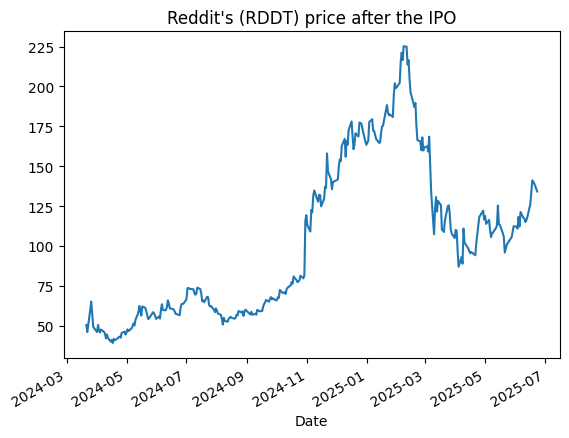

In [66]:
reddit['Close'].plot.line(title='Reddit\'s (RDDT) price after the IPO')

## 2) OHLCV data transformations

### 2.1 [Code Snippet 2] Time series for OHLCV


In [67]:
ticker_obj = yf.Ticker("NVO")
nvo_df = ticker_obj.history(period = "max", interval = "1d")

In [68]:


# big plus of an API's data: good typing from the box!
# notice DatetimeIndex - it is a recognised date
nvo_df.info()



<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11127 entries, 1981-04-30 00:00:00-04:00 to 2025-06-23 00:00:00-04:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          11127 non-null  float64
 1   High          11127 non-null  float64
 2   Low           11127 non-null  float64
 3   Close         11127 non-null  float64
 4   Volume        11127 non-null  int64  
 5   Dividends     11127 non-null  float64
 6   Stock Splits  11127 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 695.4 KB


In [69]:
nvo_df.tail()

Open       High        Low      Close  \
Date                                                                    
2025-06-16 00:00:00-04:00  77.839996  78.379997  76.620003  77.019997   
2025-06-17 00:00:00-04:00  75.510002  75.779999  74.139999  74.339996   
2025-06-18 00:00:00-04:00  74.559998  74.820000  73.699997  74.010002   
2025-06-20 00:00:00-04:00  73.839996  74.379997  72.739998  73.769997   
2025-06-23 00:00:00-04:00  68.870003  70.050003  68.540001  69.720001   

                             Volume  Dividends  Stock Splits  
Date                                                          
2025-06-16 00:00:00-04:00   8181900        0.0           0.0  
2025-06-17 00:00:00-04:00   8080000        0.0           0.0  
2025-06-18 00:00:00-04:00   5462300        0.0           0.0  
2025-06-20 00:00:00-04:00   8213000        0.0           0.0  
2025-06-23 00:00:00-04:00  15346600        0.0           0.0

In [70]:


# filter on date (index)
nvo_df_filtered_from_2020 = nvo_df[nvo_df.index>='2020-01-01']
nvo_df_filtered_from_2024 = nvo_df[nvo_df.index>='2024-01-01']



<Axes: title={'center': 'Novo Nordisk A/S (NVO) price daily'}, xlabel='Date'>

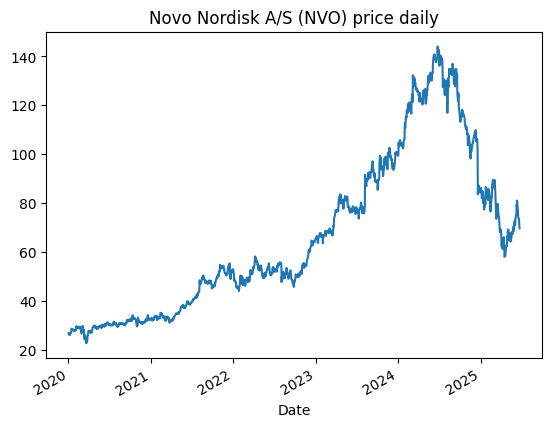

In [71]:
# Chaining: select one column, draw a plot, of a type line
nvo_df_filtered_from_2020['Close'].plot.line(title='Novo Nordisk A/S (NVO) price daily')


In [72]:
# generating new fields (using DateTime features):

nvo_df['Ticker'] = 'NVO'
nvo_df['Year']= nvo_df.index.year
nvo_df['Month'] = nvo_df.index.month
nvo_df['Weekday'] = nvo_df.index.weekday
nvo_df['Date'] = nvo_df.index.date # to be used in joins

In [73]:
nvo_df.tail()

Open       High        Low      Close  \
Date                                                                    
2025-06-16 00:00:00-04:00  77.839996  78.379997  76.620003  77.019997   
2025-06-17 00:00:00-04:00  75.510002  75.779999  74.139999  74.339996   
2025-06-18 00:00:00-04:00  74.559998  74.820000  73.699997  74.010002   
2025-06-20 00:00:00-04:00  73.839996  74.379997  72.739998  73.769997   
2025-06-23 00:00:00-04:00  68.870003  70.050003  68.540001  69.720001   

                             Volume  Dividends  Stock Splits Ticker  Year  \
Date                                                                        
2025-06-16 00:00:00-04:00   8181900        0.0           0.0    NVO  2025   
2025-06-17 00:00:00-04:00   8080000        0.0           0.0    NVO  2025   
2025-06-18 00:00:00-04:00   5462300        0.0           0.0    NVO  2025   
2025-06-20 00:00:00-04:00   8213000        0.0           0.0    NVO  2025   
2025-06-23 00:00:00-04:00  15346600        0.0           0.0    NVO  2025   

                           Month  Weekday        Date  
Date                                                   
2025-06-16 00:00:00-04:00      6        0  2025-06-16  
2025-06-17 00:00:00-04:00      6        1  2025-06-17  
2025-06-18 00:00:00-04:00      6        2  2025-06-18  
2025-06-20 00:00:00-04:00      6        4  2025-06-20  
2025-06-23 00:00:00-04:00      6        0  2025-06-23

In [74]:
# shift ALL values (on x periods forward (+1) and backward (-1))
# equivalent of joining with a dataframe of the same vector, but with shifted date index
nvo_df['close_minus_1'] = nvo_df['Close'].shift(-1)
nvo_df['close_plus_1'] = nvo_df['Close'].shift(1)

nvo_df.tail()

Open       High        Low      Close  \
Date                                                                    
2025-06-16 00:00:00-04:00  77.839996  78.379997  76.620003  77.019997   
2025-06-17 00:00:00-04:00  75.510002  75.779999  74.139999  74.339996   
2025-06-18 00:00:00-04:00  74.559998  74.820000  73.699997  74.010002   
2025-06-20 00:00:00-04:00  73.839996  74.379997  72.739998  73.769997   
2025-06-23 00:00:00-04:00  68.870003  70.050003  68.540001  69.720001   

                             Volume  Dividends  Stock Splits Ticker  Year  \
Date                                                                        
2025-06-16 00:00:00-04:00   8181900        0.0           0.0    NVO  2025   
2025-06-17 00:00:00-04:00   8080000        0.0           0.0    NVO  2025   
2025-06-18 00:00:00-04:00   5462300        0.0           0.0    NVO  2025   
2025-06-20 00:00:00-04:00   8213000        0.0           0.0    NVO  2025   
2025-06-23 00:00:00-04:00  15346600        0.0           0.0    NVO  2025   

                           Month  Weekday        Date  close_minus_1  \
Date                                                                   
2025-06-16 00:00:00-04:00      6        0  2025-06-16      74.339996   
2025-06-17 00:00:00-04:00      6        1  2025-06-17      74.010002   
2025-06-18 00:00:00-04:00      6        2  2025-06-18      73.769997   
2025-06-20 00:00:00-04:00      6        4  2025-06-20      69.720001   
2025-06-23 00:00:00-04:00      6        0  2025-06-23            NaN   

                           close_plus_1  
Date                                     
2025-06-16 00:00:00-04:00     79.830002  
2025-06-17 00:00:00-04:00     77.019997  
2025-06-18 00:00:00-04:00     74.339996  
2025-06-20 00:00:00-04:00     74.010002  
2025-06-23 00:00:00-04:00     73.769997

In [75]:
# historical growth
nvo_df['growth_1d'] = nvo_df['Close'] / nvo_df['Close'].shift(1)           # nvo_df['close_plus_1']
nvo_df['growth_30d'] = nvo_df['Close'] / nvo_df['Close'].shift(30)

# FUTURE Growth : for regression models
nvo_df['growth_future_1d'] = nvo_df['Close'].shift(-1) / nvo_df['Close']   # nvo_df['close_minus_1']
nvo_df['growth_future_30d'] = nvo_df['Close'].shift(-30) / nvo_df['Close']   # nvo_df['close_minus_1']


# FUTURE Growth: for binary models
nvo_df['is_positive_growth_1d_future'] = np.where(nvo_df['growth_future_1d'] > 1, 1, 0)
nvo_df['is_positive_growth_30d_future'] = np.where(nvo_df['growth_future_30d'] > 1, 1, 0)


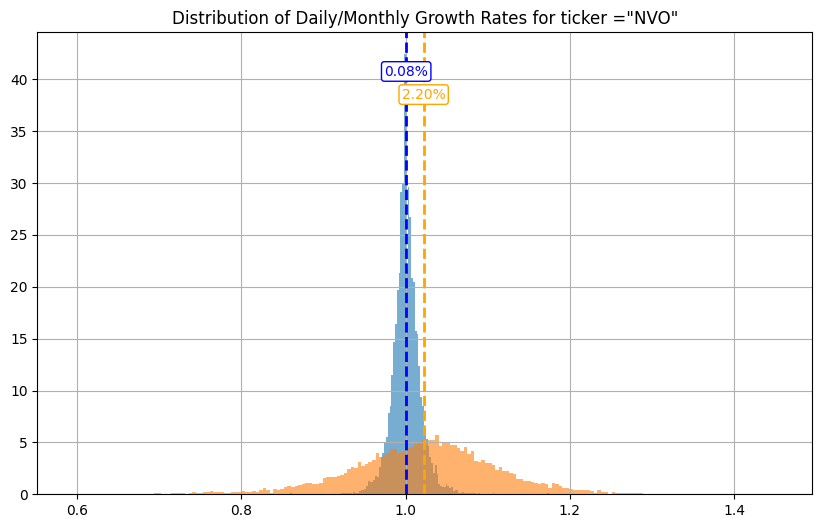

In [76]:

# normally the growth in 1 day is +-10%, while a lot of it is around 0% (around 1.)
plt.figure(figsize=(10, 6))
plt.title('Distribution of Daily/Monthly Growth Rates for ticker ="NVO"')

nvo_df.growth_1d.hist(bins=200, alpha=0.6, density=True)
nvo_df.growth_30d.hist(bins=200, alpha=0.6, density=True)

# Add vertical lines for averages
mean_1d = nvo_df.growth_1d.mean()
mean_30d = nvo_df.growth_30d.mean()

plt.axvline(mean_1d, color='blue', linestyle='--', linewidth=2, label=f'1d avg = {mean_1d:.3f}')
plt.axvline(mean_30d, color='orange', linestyle='--', linewidth=2, label=f'30d avg = {mean_30d:.3f}')


# Add mean text labels (as percent change)
ymax = plt.ylim()[1]
plt.text(mean_1d, ymax * 0.90,
         f'{(mean_1d - 1) * 100:.2f}%',
         color='blue', ha='center', va='bottom',
         bbox=dict(facecolor='white', edgecolor='blue', boxstyle='round,pad=0.2'))

plt.text(mean_30d, ymax * 0.85,
         f'{(mean_30d - 1) * 100:.2f}%',
         color='orange', ha='center', va='bottom',
         bbox=dict(facecolor='white', edgecolor='orange', boxstyle='round,pad=0.2'))


plt.show()

In [77]:
mean_1d

np.float64(1.0007746160118027)

In [78]:
mean_30d

np.float64(1.0220299766500267)

In [79]:
ymax

np.float64(44.52315723912487)

(np.float64(0.0), np.float64(1.0))

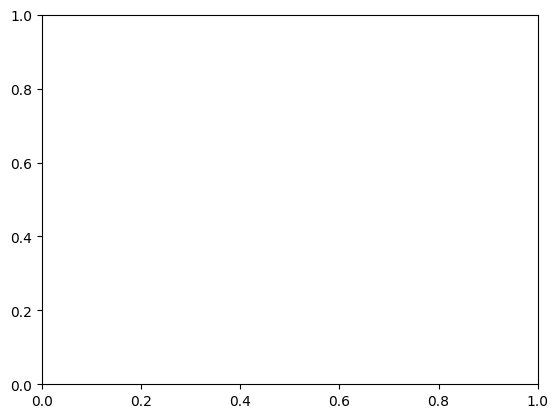

In [80]:
plt.ylim()

np.float64(1.0)

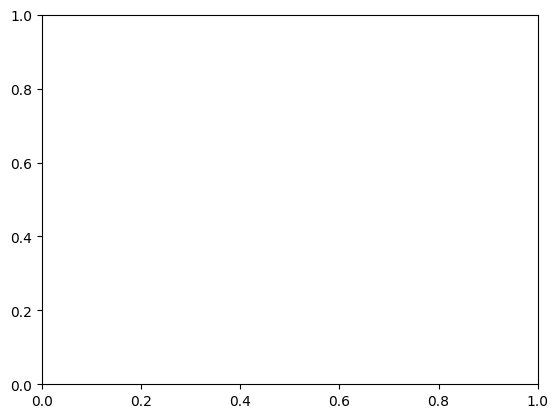

In [81]:
plt.ylim()[1]

<Axes: title={'center': 'Distribution of 2-days Growth Rates for ticker = "NVO"'}>

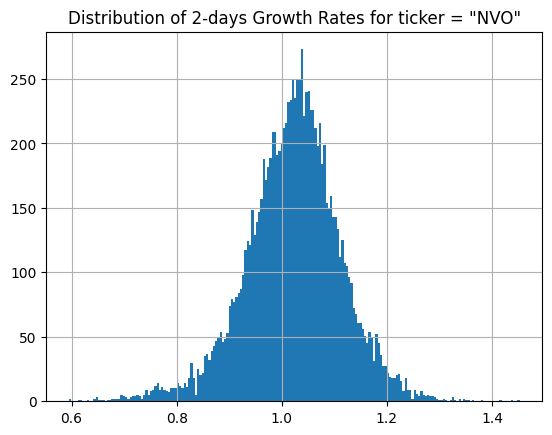

In [82]:
# you can see that the growth is can be much wider in 30 days (+- 30%)
plt.title('Distribution of 2-days Growth Rates for ticker = "NVO"')

nvo_df.growth_30d.hist(bins=200)

In [83]:


# for modeling: we use growth_1d, growth_2d as feature
COLUMNS = [k for k in nvo_df.keys() if k.find('growth')>=0 or k=='Close']
nvo_df[COLUMNS].tail()



Close  growth_1d  growth_30d  growth_future_1d  \
Date                                                                            
2025-06-16 00:00:00-04:00  77.019997   0.964800    1.112523          0.965204   
2025-06-17 00:00:00-04:00  74.339996   0.965204    1.075521          0.995561   
2025-06-18 00:00:00-04:00  74.010002   0.995561    1.116458          0.996757   
2025-06-20 00:00:00-04:00  73.769997   0.996757    1.092080          0.945100   
2025-06-23 00:00:00-04:00  69.720001   0.945100    1.075096               NaN   

                           growth_future_30d  is_positive_growth_1d_future  \
Date                                                                         
2025-06-16 00:00:00-04:00                NaN                             0   
2025-06-17 00:00:00-04:00                NaN                             0   
2025-06-18 00:00:00-04:00                NaN                             0   
2025-06-20 00:00:00-04:00                NaN                             0   
2025-06-23 00:00:00-04:00                NaN                             0   

                           is_positive_growth_30d_future  
Date                                                      
2025-06-16 00:00:00-04:00                              0  
2025-06-17 00:00:00-04:00                              0  
2025-06-18 00:00:00-04:00                              0  
2025-06-20 00:00:00-04:00                              0  
2025-06-23 00:00:00-04:00                              0

In [84]:


# Calculate the distribution if future growth
nvo_df.is_positive_growth_1d_future.value_counts() / len(nvo_df)



is_positive_growth_1d_future
0    0.513076
1    0.486924
Name: count, dtype: float64

In [85]:
nvo_df.is_positive_growth_30d_future.value_counts() / len(nvo_df)

is_positive_growth_30d_future
1    0.620113
0    0.379887
Name: count, dtype: float64

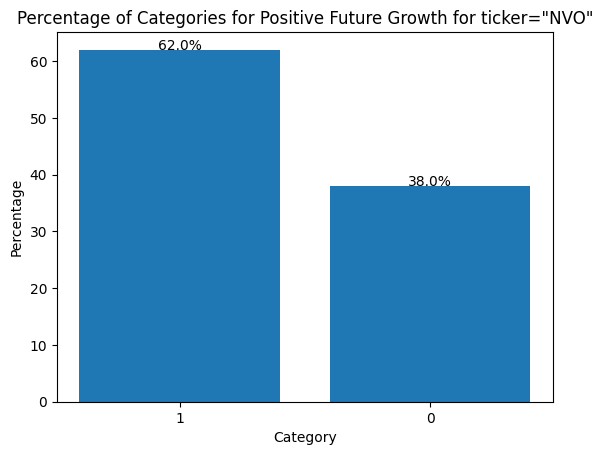

In [86]:
# Calculate value counts
value_counts = nvo_df['is_positive_growth_30d_future'].value_counts()

# Calculate percentage of each category
percentage = (value_counts / len(nvo_df)) * 100

# Plot as a bar chart
plt.bar(percentage.index.astype(str), percentage)
plt.xlabel('Category')
plt.ylabel('Percentage')
plt.title('Percentage of Categories for Positive Future Growth for ticker="NVO"')

# Add percentage values on top of each bar
for i, value in enumerate(percentage):
    plt.text(i, value + 0, f'{value:.1f}%', ha='center')

plt.show()

### 2.2) [Code Snippet 6] Candlestick chart for OHLCV



In [87]:
# Candlestick charts : https://plotly.com/python/candlestick-charts/
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x=nvo_df_filtered_from_2020.index,
                open=nvo_df_filtered_from_2020.Open,
                high=nvo_df_filtered_from_2020.High,
                low=nvo_df_filtered_from_2020.Low,
                close=nvo_df_filtered_from_2020.Close)
               ])

fig.update_layout(
    title="NVO's daily candlestick chart from 2020",
    title_x=0.5,  # Set title x-position to center
    xaxis_rangeslider_visible=True
    )

fig.show()

## 3) Macro Indicators

### 3.0) Previous indicators from module 1

In [88]:
end = date.today()
print(f'Year = {end.year}; month= {end.month}; day={end.day}')

start = date(year=end.year-70, month=end.month, day=end.day)
print(f'Period for indexes: {start} to {end} ')

Year = 2025; month= 6; day=24
Period for indexes: 1955-06-24 to 2025-06-24 


In [89]:
# reuse code for ealier covered indicators
ticker_obj = yf.Ticker("^GDAXI")
dax_daily = ticker_obj.history(period = "max", interval = "1d")

In [90]:
for i in [1,3,7,30,90,365]:
  #DEBUG: dax_daily['Adj Close_sh_m_'+str(i)+'d'] = dax_daily['Adj Close'].shift(i)
  dax_daily['growth_dax_'+str(i)+'d'] = dax_daily['Close'] / dax_daily['Close'].shift(i)

In [91]:
dax_daily.head()

Open         High          Low        Close  \
Date                                                                            
1987-12-30 00:00:00+01:00  1005.190002  1005.190002  1005.190002  1005.190002   
1988-01-04 00:00:00+01:00   956.489990   956.489990   956.489990   956.489990   
1988-01-05 00:00:00+01:00   996.099976   996.099976   996.099976   996.099976   
1988-01-06 00:00:00+01:00  1006.010010  1006.010010  1006.010010  1006.010010   
1988-01-07 00:00:00+01:00  1014.469971  1014.469971  1014.469971  1014.469971   

                           Volume  Dividends  Stock Splits  growth_dax_1d  \
Date                                                                        
1987-12-30 00:00:00+01:00       0        0.0           0.0            NaN   
1988-01-04 00:00:00+01:00       0        0.0           0.0       0.951551   
1988-01-05 00:00:00+01:00       0        0.0           0.0       1.041412   
1988-01-06 00:00:00+01:00       0        0.0           0.0       1.009949   
1988-01-07 00:00:00+01:00       0        0.0           0.0       1.008409   

                           growth_dax_3d  growth_dax_7d  growth_dax_30d  \
Date                                                                      
1987-12-30 00:00:00+01:00            NaN            NaN             NaN   
1988-01-04 00:00:00+01:00            NaN            NaN             NaN   
1988-01-05 00:00:00+01:00            NaN            NaN             NaN   
1988-01-06 00:00:00+01:00       1.000816            NaN             NaN   
1988-01-07 00:00:00+01:00       1.060617            NaN             NaN   

                           growth_dax_90d  growth_dax_365d  
Date                                                        
1987-12-30 00:00:00+01:00             NaN              NaN  
1988-01-04 00:00:00+01:00             NaN              NaN  
1988-01-05 00:00:00+01:00             NaN              NaN  
1988-01-06 00:00:00+01:00             NaN              NaN  
1988-01-07 00:00:00+01:00             NaN              NaN

In [92]:


dax_daily.tail(2)



Open          High           Low  \
Date                                                                  
2025-06-20 00:00:00+02:00  23197.119141  23481.970703  23187.480469   
2025-06-23 00:00:00+02:00  23242.900391  23385.599609  23080.289062   

                                  Close     Volume  Dividends  Stock Splits  \
Date                                                                          
2025-06-20 00:00:00+02:00  23350.550781  153406000        0.0           0.0   
2025-06-23 00:00:00+02:00  23269.009766   50041400        0.0           0.0   

                           growth_dax_1d  growth_dax_3d  growth_dax_7d  \
Date                                                                     
2025-06-20 00:00:00+02:00       1.012715       0.996411       0.975016   
2025-06-23 00:00:00+02:00       0.996508       0.997907       0.978864   

                           growth_dax_30d  growth_dax_90d  growth_dax_365d  
Date                                                                        
2025-06-20 00:00:00+02:00        0.993669        1.059567         1.411163  
2025-06-23 00:00:00+02:00        0.987375        1.050613         1.392973

In [93]:


GROWTH_KEYS = [k for k in dax_daily.keys() if k.startswith('growth')]
dax_daily_to_merge = dax_daily[GROWTH_KEYS]
dax_daily_to_merge.tail(1)



growth_dax_1d  growth_dax_3d  growth_dax_7d  \
Date                                                                     
2025-06-23 00:00:00+02:00       0.996508       0.997907       0.978864   

                           growth_dax_30d  growth_dax_90d  growth_dax_365d  
Date                                                                        
2025-06-23 00:00:00+02:00        0.987375        1.050613         1.392973

In [94]:
GROWTH_KEYS

['growth_dax_1d',
 'growth_dax_3d',
 'growth_dax_7d',
 'growth_dax_30d',
 'growth_dax_90d',
 'growth_dax_365d']

In [95]:


def get_growth_df(df:pd.DataFrame, prefix:str)->pd.DataFrame:
  for i in [1,3,7,30,90,365]:
    df['growth_'+prefix+'_'+str(i)+'d'] = df['Close'] / df['Close'].shift(i)
    GROWTH_KEYS = [k for k in df.keys() if k.startswith('growth')]
  return df[GROWTH_KEYS]



In [96]:
# https://finance.yahoo.com/quote/%5EGSPC/
# SNP - SNP Real Time Price. Currency in USD
ticker_obj = yf.Ticker("^GSPC")

# snp500_daily = yf.download(tickers = "^GSPC",
#                      period = "max",
#                      interval = "1d")

snp500_daily = ticker_obj.history(
                     period = "max",
                     interval = "1d")


In [97]:


snp500_to_merge = get_growth_df(snp500_daily,'snp500')
snp500_to_merge.tail(2)



growth_snp500_1d  growth_snp500_3d  \
Date                                                            
2025-06-20 00:00:00-04:00          0.997821          0.989181   
2025-06-23 00:00:00-04:00          1.009607          1.007095   

                           growth_snp500_7d  growth_snp500_30d  \
Date                                                             
2025-06-20 00:00:00-04:00          0.988248           1.059766   
2025-06-23 00:00:00-04:00          1.000486           1.063777   

                           growth_snp500_90d  growth_snp500_365d  
Date                                                              
2025-06-20 00:00:00-04:00           0.983747            1.272819  
2025-06-23 00:00:00-04:00           0.992860            1.282704

In [98]:
# Dow Jones Industrial Average: https://finance.yahoo.com/quote/%5EDJI?.tsrc=fin-srch

ticker_obj = yf.Ticker("^DJI")

# dji_daily = yf.download(tickers = "^DJI",
#                      period = "max",
#                      interval = "1d")


dji_daily = ticker_obj.history(
                     period = "max",
                     interval = "1d")

In [99]:


dji_daily_to_merge = get_growth_df(dji_daily,'dji')
dji_daily_to_merge.tail(2)



growth_dji_1d  growth_dji_3d  growth_dji_7d  \
Date                                                                     
2025-06-20 00:00:00-04:00       1.000834       0.992749       0.984602   
2025-06-23 00:00:00-04:00       1.008884       1.008669       0.993375   

                           growth_dji_30d  growth_dji_90d  growth_dji_365d  
Date                                                                        
2025-06-20 00:00:00-04:00        1.026581        0.949099         1.127309  
2025-06-23 00:00:00-04:00        1.029330        0.954884         1.136541

In [100]:


# ETFs
# WisdomTree India Earnings Fund (EPI)
# NYSEArca - Nasdaq Real Time Price. Currency in USD
# WEB: https://finance.yahoo.com/quote/EPI/history?p=EPI

# epi_etf_daily = yf.download(tickers = "EPI",
#                      period = "max",
#                      interval = "1d")

ticker_obj = yf.Ticker("EPI")
epi_etf_daily = ticker_obj.history(
                     period = "max",
                     interval = "1d")

epi_etf_daily.tail(2)



Open       High        Low      Close  Volume  \
Date                                                                            
2025-06-20 00:00:00-04:00  46.090000  46.110001  45.849998  45.880001  963900   
2025-06-23 00:00:00-04:00  45.810001  46.220001  45.770000  46.189999  770200   

                           Dividends  Stock Splits  Capital Gains  
Date                                                               
2025-06-20 00:00:00-04:00        0.0           0.0            0.0  
2025-06-23 00:00:00-04:00        0.0           0.0            0.0

In [101]:
epi_etf_daily_to_merge = get_growth_df(epi_etf_daily,'epi')
epi_etf_daily_to_merge.tail(2)

growth_epi_1d  growth_epi_3d  growth_epi_7d  \
Date                                                                     
2025-06-20 00:00:00-04:00       1.000000       0.985395       0.972240   
2025-06-23 00:00:00-04:00       1.006757       1.005223       0.976326   

                           growth_epi_30d  growth_epi_90d  growth_epi_365d  
Date                                                                        
2025-06-20 00:00:00-04:00        1.020236        1.063761         1.114634  
2025-06-23 00:00:00-04:00        1.060133        1.080974         1.117292

In [102]:
# Real Potential Gross Domestic Product (GDPPOT), Billions of Chained 2012 Dollars, QUARTERLY
# https://fred.stlouisfed.org/series/GDPPOT
gdppot = pdr.DataReader("GDPPOT", "fred", start=start)
gdppot['gdppot_us_yoy'] = gdppot.GDPPOT/gdppot.GDPPOT.shift(4)-1
gdppot['gdppot_us_qoq'] = gdppot.GDPPOT/gdppot.GDPPOT.shift(1)-1
gdppot.tail(2)

GDPPOT  gdppot_us_yoy  gdppot_us_qoq
DATE                                              
2025-01-01  23243.22       0.023113       0.005619
2025-04-01  23376.07       0.023029       0.005716

In [103]:
gdppot_to_merge = gdppot[['gdppot_us_yoy','gdppot_us_qoq']]
gdppot_to_merge.tail(1)


gdppot_us_yoy  gdppot_us_qoq
DATE                                    
2025-04-01       0.023029       0.005716

In [104]:


# # "Core CPI index", MONTHLY
# https://fred.stlouisfed.org/series/CPILFESL
# The "Consumer Price Index for All Urban Consumers: All Items Less Food & Energy"
# is an aggregate of prices paid by urban consumers for a typical basket of goods, excluding food and energy.
# This measurement, known as "Core CPI," is widely used by economists because food and energy have very volatile prices.
cpilfesl = pdr.DataReader("CPILFESL", "fred", start=start)
cpilfesl['cpi_core_yoy'] = cpilfesl.CPILFESL/cpilfesl.CPILFESL.shift(12)-1
cpilfesl['cpi_core_mom'] = cpilfesl.CPILFESL/cpilfesl.CPILFESL.shift(1)-1

cpilfesl.tail(2)



CPILFESL  cpi_core_yoy  cpi_core_mom
DATE                                            
2025-04-01   326.430      0.027815      0.002368
2025-05-01   326.854      0.027671      0.001299

In [105]:
cpilfesl_to_merge = cpilfesl[['cpi_core_yoy','cpi_core_mom']]
cpilfesl_to_merge.tail(2)

cpi_core_yoy  cpi_core_mom
DATE                                  
2025-04-01      0.027815      0.002368
2025-05-01      0.027671      0.001299

In [106]:


# Fed rate https://fred.stlouisfed.org/series/FEDFUNDS
fedfunds = pdr.DataReader("FEDFUNDS", "fred", start=start)
fedfunds.tail(2)



FEDFUNDS
DATE                
2025-04-01      4.33
2025-05-01      4.33

In [220]:


# https://fred.stlouisfed.org/series/DGS1
dgs1 = pdr.DataReader("DGS1", "fred", start=start)
dgs1.tail(2)



DGS1
DATE            
2025-06-19   NaN
2025-06-20  4.07

In [107]:
# https://fred.stlouisfed.org/series/DGS5
dgs5 = pdr.DataReader("DGS5", "fred", start=start)
dgs5.tail(2)

DGS5
DATE            
2025-06-19   NaN
2025-06-20  3.96

In [108]:


# https://fred.stlouisfed.org/series/DGS10
dgs10 = pdr.DataReader("DGS10", "fred", start=start)
dgs10.tail(2)



DGS10
DATE             
2025-06-19    NaN
2025-06-20   4.38

### 3.1) [Code snippet 3] VIX - Volatility Index

In [109]:
# VIX - Volatility Index
# https://finance.yahoo.com/quote/%5EVIX/

ticker_obj = yf.Ticker("^VIX")

# vix = yf.download(tickers = "^VIX",
#                      period = "max",
#                      interval = "1d")

vix = ticker_obj.history(
                     period = "max",
                     interval = "1d")

In [110]:
vix.tail(2)

Open   High        Low      Close  Volume  \
Date                                                                    
2025-06-20 00:00:00-05:00  20.74  21.07  19.110001  20.620001       0   
2025-06-23 00:00:00-05:00  21.15  22.51  19.820000  19.830000       0   

                           Dividends  Stock Splits  
Date                                                
2025-06-20 00:00:00-05:00        0.0           0.0  
2025-06-23 00:00:00-05:00        0.0           0.0

In [111]:


vix_to_merge = vix['Close']
vix_to_merge.tail()



Date
2025-06-16 00:00:00-05:00    19.110001
2025-06-17 00:00:00-05:00    21.600000
2025-06-18 00:00:00-05:00    20.139999
2025-06-20 00:00:00-05:00    20.620001
2025-06-23 00:00:00-05:00    19.830000
Name: Close, dtype: float64

<Axes: title={'center': 'VIX value over time'}, xlabel='Date'>

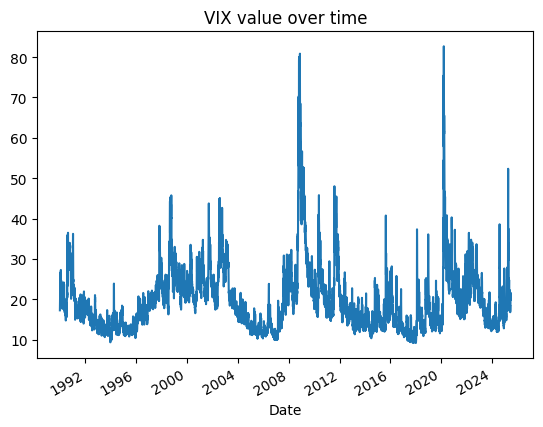

In [112]:


# Static graphs: hard to zoom in and get the exact dates of spikes
vix['Close'].plot.line(title = "VIX value over time")



In [113]:


# Dynamic visualisation of VIX prices
fig = px.line(vix,
              x=vix.index,
              y="Close",
              title='VIX over time')
fig.update_layout(title_x=0.5)  # This will center the title horizontally

fig.show()



### 3.2) Gold - other assets


In [114]:


# GOLD
# WEB: https://finance.yahoo.com/quote/GC%3DF

ticker_obj = yf.Ticker("GC=F")

# gold = yf.download(tickers = "GC=F",
#                      period = "max",
#                      interval = "1d")

gold = ticker_obj.history(
                     period = "max",
                     interval = "1d")



In [115]:
gold.tail(1)

Open    High     Low   Close  Volume  \
Date                                                                     
2025-06-24 00:00:00-04:00  3383.800049  3385.0  3347.0  3364.0   45029   

                           Dividends  Stock Splits  
Date                                                
2025-06-24 00:00:00-04:00        0.0           0.0

In [116]:


gold_to_merge = get_growth_df(gold,'gold')
gold_to_merge.tail(2)



growth_gold_1d  growth_gold_3d  growth_gold_7d  \
Date                                                                        
2025-06-23 00:00:00-04:00        1.002850        0.997372        1.016981   
2025-06-24 00:00:00-04:00        0.995944        0.992389        0.995001   

                           growth_gold_30d  growth_gold_90d  growth_gold_365d  
Date                                                                           
2025-06-23 00:00:00-04:00         1.024601         1.159725          1.666683  
2025-06-24 00:00:00-04:00         1.008575         1.156411          1.660087

In [117]:


# Dynamic visualisation of GOLD prices
fig = px.line(gold,
              x=gold.index,
              y="Close",
              title='GOLD over time')
fig.update_layout(title_x=0.5)  # This will center the title horizontally

fig.show()



### 3.3) WTI Crude and Brent Oil


In [118]:
# WTI Crude Oil
# WEB: https://uk.finance.yahoo.com/quote/CL=F/

ticker_obj = yf.Ticker("CL=F")

# crude_oil = yf.download(tickers = "CL=F",
#                      period = "max",
#                      interval = "1d")

crude_oil = ticker_obj.history(
                     period = "max",
                     interval = "1d")

In [119]:
crude_oil.tail(2)

Open       High        Low      Close  Volume  \
Date                                                                            
2025-06-23 00:00:00-04:00  78.000000  78.400002  66.599998  68.510002  678377   
2025-06-24 00:00:00-04:00  67.739998  67.830002  64.379997  66.800003  105201   

                           Dividends  Stock Splits  
Date                                                
2025-06-23 00:00:00-04:00        0.0           0.0  
2025-06-24 00:00:00-04:00        0.0           0.0

In [120]:


crude_oil_to_merge = get_growth_df(crude_oil,'wti_oil')
crude_oil_to_merge.tail(2)



growth_wti_oil_1d  growth_wti_oil_3d  \
Date                                                              
2025-06-23 00:00:00-04:00            0.91432           0.915420   
2025-06-24 00:00:00-04:00            0.97504           0.889007   

                           growth_wti_oil_7d  growth_wti_oil_30d  \
Date                                                               
2025-06-23 00:00:00-04:00           1.005282            1.143549   
2025-06-24 00:00:00-04:00           0.981775            1.094723   

                           growth_wti_oil_90d  growth_wti_oil_365d  
Date                                                                
2025-06-23 00:00:00-04:00            0.934397             0.968066  
2025-06-24 00:00:00-04:00            0.935968             0.924696

In [121]:


# Dynamic visualisation
fig = px.line(crude_oil,
              x=crude_oil.index,
              y="Close",
              title='WTI Crude Oil over time')
fig.update_layout(title_x=0.5)  # This will center the title horizontally

fig.show()



In [122]:


# Brent Oil
# WEB: https://uk.finance.yahoo.com/quote/BZ=F/

ticker_obj = yf.Ticker("BZ=F")

# brent_oil = yf.download(tickers = "BZ=F",
#                      period = "max",
#                      interval = "1d")

brent_oil = ticker_obj.history(
                     period = "max",
                     interval = "1d")

brent_oil.tail(2)



Open       High        Low      Close  Volume  \
Date                                                                            
2025-06-23 00:00:00-04:00  80.010002  81.400002  69.540001  71.480003   98821   
2025-06-24 00:00:00-04:00  70.599998  70.730003  67.339996  69.779999    9744   

                           Dividends  Stock Splits  
Date                                                
2025-06-23 00:00:00-04:00        0.0           0.0  
2025-06-24 00:00:00-04:00        0.0           0.0

In [123]:


brent_oil_to_merge = get_growth_df(brent_oil,'brent_oil')
brent_oil_to_merge.tail(2)



growth_brent_oil_1d  growth_brent_oil_3d  \
Date                                                                  
2025-06-23 00:00:00-04:00             0.928191             0.934990   
2025-06-24 00:00:00-04:00             0.976217             0.909778   

                           growth_brent_oil_7d  growth_brent_oil_30d  \
Date                                                                   
2025-06-23 00:00:00-04:00             1.024509              1.137492   
2025-06-24 00:00:00-04:00             1.006055              1.091848   

                           growth_brent_oil_90d  growth_brent_oil_365d  
Date                                                                    
2025-06-23 00:00:00-04:00              0.928312               0.939044  
2025-06-24 00:00:00-04:00              0.928172               0.899343

In [124]:


# Dynamic visualisation
fig = px.line(brent_oil,
              x=brent_oil.index,
              y="Close",
              title='Brent Oil over time')
fig.update_layout(title_x=0.5)  # This will center the title horizontally

fig.show()




### 3.4) Bitcoin prices: BTC_USD


In [125]:
# https://finance.yahoo.com/quote/BTC-USD/

ticker_obj = yf.Ticker("BTC-USD")

# btc_usd =  yf.download(tickers = "BTC-USD",
#                      period = "max",
#                      interval = "1d")


btc_usd =  ticker_obj.history(
                     period = "max",
                     interval = "1d")

btc_usd.tail(2)

Open           High            Low  \
Date                                                                     
2025-06-22 00:00:00+00:00  102212.031250  103351.632812   98286.203125   
2025-06-24 00:00:00+00:00  105416.820312  105533.234375  104826.750000   

                                   Close       Volume  Dividends  Stock Splits  
Date                                                                            
2025-06-22 00:00:00+00:00  100987.140625  65536997201        0.0           0.0  
2025-06-24 00:00:00+00:00  104976.007812  65556721664        0.0           0.0

In [126]:


btc_usd_to_merge = get_growth_df(btc_usd,'btc_usd')
btc_usd_to_merge.tail(2)



growth_btc_usd_1d  growth_btc_usd_3d  \
Date                                                              
2025-06-22 00:00:00+00:00           0.987578           0.964683   
2025-06-24 00:00:00+00:00           1.039499           1.016130   

                           growth_btc_usd_7d  growth_btc_usd_30d  \
Date                                                               
2025-06-22 00:00:00+00:00           0.956752            0.941273   
2025-06-24 00:00:00+00:00           0.982951            0.973883   

                           growth_btc_usd_90d  growth_btc_usd_365d  
Date                                                                
2025-06-22 00:00:00+00:00            1.154153             1.571721  
2025-06-24 00:00:00+00:00            1.200114             1.661518

In [127]:
# Dynamic visualisation
fig = px.line(btc_usd,
              x=btc_usd.index,
              y="Close",
              title='Bitcoin price daily')
fig.update_layout(title_x=0.5)  # This will center the title horizontally

fig.show()


### 3.5 [Code snippet 4] Eurostat: "The home of high-quality statistics and data on Europe"

In [128]:


!pip install eurostat

# https://pypi.org/project/eurostat/
# https://ec.europa.eu/eurostat/web/main/data/database



In [129]:
import eurostat

In [130]:
# LONG WAIT TIME ~15 min, unless you filter data

# https://ec.europa.eu/eurostat/cache/metadata/en/irt_euryld_esms.htm
  # Euro yield curves (irt_euryld)
  # Reference Metadata in Euro SDMX Metadata Structure (ESMS)
  # Compiling agency: Eurostat, the statistical office of the European Uni

# the service is slow, you need to specify addtional params : https://pypi.org/project/eurostat/0.2.3/

filter_pars = {'startPeriod':'2025-05-01', 'endPeriod':'2025-06-01'}

code = 'irt_euryld_d'
eurostat_euro_yield_df = eurostat.get_data_df(code, flags=True, filter_pars=filter_pars,  verbose=True)

Download progress: 100.0%



In [131]:
eurostat_euro_yield_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2148 entries, 0 to 2147
Data columns (total 47 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   freq              2148 non-null   object 
 1   yld_curv          2148 non-null   object 
 2   maturity          2148 non-null   object 
 3   bonds             2148 non-null   object 
 4   geo\TIME_PERIOD   2148 non-null   object 
 5   2025-05-02_value  2148 non-null   float64
 6   2025-05-02_flag   2148 non-null   object 
 7   2025-05-05_value  2148 non-null   float64
 8   2025-05-05_flag   2148 non-null   object 
 9   2025-05-06_value  2148 non-null   float64
 10  2025-05-06_flag   2148 non-null   object 
 11  2025-05-07_value  2148 non-null   float64
 12  2025-05-07_flag   2148 non-null   object 
 13  2025-05-08_value  2148 non-null   float64
 14  2025-05-08_flag   2148 non-null   object 
 15  2025-05-09_value  2148 non-null   float64
 16  2025-05-09_flag   2148 non-null   object 


In [132]:
eurostat_euro_yield_df.head()

freq yld_curv maturity       bonds geo\TIME_PERIOD  2025-05-02_value  \
0    D  INS_FWD      M10      CGB_EA              EA           1.73842   
1    D  INS_FWD      M10  CGB_EA_AAA              EA           1.69567   
2    D  INS_FWD      M11      CGB_EA              EA           1.73363   
3    D  INS_FWD      M11  CGB_EA_AAA              EA           1.68855   
4    D  INS_FWD       M3      CGB_EA              EA           1.97791   

  2025-05-02_flag  2025-05-05_value 2025-05-05_flag  2025-05-06_value  ...  \
0                           1.75209                           1.73532  ...   
1                           1.68046                           1.70880  ...   
2                           1.74807                           1.73333  ...   
3                           1.67297                           1.70111  ...   
4                           1.96619                           1.96325  ...   

  2025-05-26_value  2025-05-26_flag 2025-05-27_value  2025-05-27_flag  \
0          1.71428                           1.71732                    
1          1.71962                           1.71396                    
2          1.71798                           1.72237                    
3          1.71803                           1.71302                    
4          1.94160                           1.93798                    

  2025-05-28_value  2025-05-28_flag 2025-05-29_value  2025-05-29_flag  \
0          1.73586                           1.70104                    
1          1.73539                           1.71651                    
2          1.73990                           1.70527                    
3          1.73309                           1.71424                    
4          1.94852                           1.93120                    

  2025-05-30_value  2025-05-30_flag  
0          1.73912                   
1          1.72649                   
2          1.74145                   
3          1.72509                   
4          1.93735                   

[5 rows x 47 columns]

In [133]:
eurostat_euro_yield_df['bonds'].value_counts()

bonds
CGB_EA        1074
CGB_EA_AAA    1074
Name: count, dtype: int64

In [134]:
eurostat_euro_yield_df['maturity'].value_counts()

maturity
Y9_M9    6
M10      6
M11      6
M3       6
M4       6
        ..
Y10      6
Y1       6
M9       6
M8       6
M7       6
Name: count, Length: 358, dtype: int64

In [135]:
eurostat_euro_yield_df['yld_curv'].value_counts()

yld_curv
INS_FWD    716
PAR        716
SPOT_RT    716
Name: count, dtype: int64

In [136]:
eurostat_euro_yield_df

freq yld_curv maturity       bonds geo\TIME_PERIOD  2025-05-02_value  \
0       D  INS_FWD      M10      CGB_EA              EA           1.73842   
1       D  INS_FWD      M10  CGB_EA_AAA              EA           1.69567   
2       D  INS_FWD      M11      CGB_EA              EA           1.73363   
3       D  INS_FWD      M11  CGB_EA_AAA              EA           1.68855   
4       D  INS_FWD       M3      CGB_EA              EA           1.97791   
...   ...      ...      ...         ...             ...               ...   
2143    D  SPOT_RT    Y9_M7  CGB_EA_AAA              EA           2.56000   
2144    D  SPOT_RT    Y9_M8      CGB_EA              EA           3.09194   
2145    D  SPOT_RT    Y9_M8  CGB_EA_AAA              EA           2.56737   
2146    D  SPOT_RT    Y9_M9      CGB_EA              EA           3.10140   
2147    D  SPOT_RT    Y9_M9  CGB_EA_AAA              EA           2.57465   

     2025-05-02_flag  2025-05-05_value 2025-05-05_flag  2025-05-06_value  ...  \
0                              1.75209                           1.73532  ...   
1                              1.68046                           1.70880  ...   
2                              1.74807                           1.73333  ...   
3                              1.67297                           1.70111  ...   
4                              1.96619                           1.96325  ...   
...              ...               ...             ...               ...  ...   
2143                           2.58380                           2.61680  ...   
2144                           3.11837                           3.15733  ...   
2145                           2.59130                           2.62451  ...   
2146                           3.12818                           3.16710  ...   
2147                           2.59871                           2.63213  ...   

     2025-05-26_value  2025-05-26_flag 2025-05-27_value  2025-05-27_flag  \
0             1.71428                           1.71732                    
1             1.71962                           1.71396                    
2             1.71798                           1.72237                    
3             1.71803                           1.71302                    
4             1.94160                           1.93798                    
...               ...              ...              ...              ...   
2143          2.63569                           2.60094                    
2144          3.13756                           3.09442                    
2145          2.64314                           2.60802                    
2146          3.14705                           3.10358                    
2147          2.65052                           2.61501                    

     2025-05-28_value  2025-05-28_flag 2025-05-29_value  2025-05-29_flag  \
0             1.73586                           1.70104                    
1             1.73539                           1.71651                    
2             1.73990                           1.70527                    
3             1.73309                           1.71424                    
4             1.94852                           1.93120                    
...               ...              ...              ...              ...   
2143          2.61034                           2.57690                    
2144          3.10789                           3.06678                    
2145          2.61738                           2.58400                    
2146          3.11705                           3.07587                    
2147          2.62435                           2.59102                    

     2025-05-30_value  2025-05-30_flag  
0             1.73912                   
1             1.72649                   
2             1.74145                   
3             1.72509                   
4             1.93735                   
...               ...              

In [137]:
# Visual graph: https://www.ecb.europa.eu/stats/financial_markets_and_interest_rates/euro_area_yield_curves/html/index.en.html
FILTER = (eurostat_euro_yield_df.yld_curv=='SPOT_RT')& (eurostat_euro_yield_df.bonds=='CGB_EA_AAA')
filtered_eurostat_euro_yield_df = eurostat_euro_yield_df[FILTER]

In [138]:
filtered_eurostat_euro_yield_df.sort_values(by='maturity')[['maturity','2025-05-05_value']].head(20)

maturity  2025-05-05_value
1433      M10           1.79463
1435      M11           1.78389
1437       M3           1.91227
1439       M4           1.89037
1441       M5           1.87031
1443       M6           1.85200
1445       M7           1.83535
1447       M8           1.82029
1449       M9           1.80674
1451       Y1           1.77444
1453      Y10           2.62042
1455   Y10_M1           2.62749
1457  Y10_M10           2.68730
1459  Y10_M11           2.69354
1461   Y10_M2           2.63447
1463   Y10_M3           2.64137
1465   Y10_M4           2.64818
1467   Y10_M5           2.65491
1469   Y10_M6           2.66155
1471   Y10_M7           2.66811

In [139]:
filtered_eurostat_euro_yield_df.sort_values(by='maturity')[['maturity','2025-05-29_value']].head(20)

maturity  2025-05-29_value
1433      M10           1.78884
1435      M11           1.78214
1437       M3           1.86951
1439       M4           1.85393
1441       M5           1.83981
1443       M6           1.82708
1445       M7           1.81569
1447       M8           1.80555
1449       M9           1.79662
1451       Y1           1.77647
1453      Y10           2.61164
1455   Y10_M1           2.61836
1457  Y10_M10           2.67547
1459  Y10_M11           2.68145
1461   Y10_M2           2.62500
1463   Y10_M3           2.63157
1465   Y10_M4           2.63806
1467   Y10_M5           2.64448
1469   Y10_M6           2.65083
1471   Y10_M7           2.65710

In [140]:
import re

def extract_numbers(input_string):
    y_match = re.search(r'Y(\d+)', input_string)
    m_match = re.search(r'M(\d+)', input_string)

    y_number = int(y_match.group(1)) if y_match else 0
    m_number = int(m_match.group(1)) if m_match else 0


    return y_number*12 + m_number

# Examples
examples = ["Y10_M2", "M3", "Y1"]
for example in examples:
    res = extract_numbers(example)
    print(f"{example} ==> {res}")

Y10_M2 ==> 122
M3 ==> 3
Y1 ==> 12


In [141]:
# define new field: "maturity in months"
filtered_eurostat_euro_yield_df.loc[:,'maturity_in_months'] = filtered_eurostat_euro_yield_df.maturity.apply(lambda x:extract_numbers(x))


/tmp/ipython-input-141-3842898120.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [142]:
filtered_eurostat_euro_yield_df.sort_values(by='maturity_in_months')[['maturity','maturity_in_months','2025-05-29_value']].head(20)

maturity  maturity_in_months  2025-05-29_value
1437       M3                   3           1.86951
1439       M4                   4           1.85393
1441       M5                   5           1.83981
1443       M6                   6           1.82708
1445       M7                   7           1.81569
1447       M8                   8           1.80555
1449       M9                   9           1.79662
1433      M10                  10           1.78884
1435      M11                  11           1.78214
1451       Y1                  12           1.77647
1693    Y1_M1                  13           1.77179
1699    Y1_M2                  14           1.76804
1701    Y1_M3                  15           1.76518
1703    Y1_M4                  16           1.76316
1705    Y1_M5                  17           1.76193
1707    Y1_M6                  18           1.76146
1709    Y1_M7                  19           1.76171
1711    Y1_M8                  20           1.76264
1713    Y1_M9                  21           1.76422
1695   Y1_M10                  22           1.76640

In [143]:
filtered_eurostat_euro_yield_df.loc[:,'maturity_in_years'] = filtered_eurostat_euro_yield_df.maturity_in_months/12.0

/tmp/ipython-input-143-2163179308.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<Axes: title={'center': 'AAA rated bonds spot yield curve'}, xlabel='maturity_in_years'>

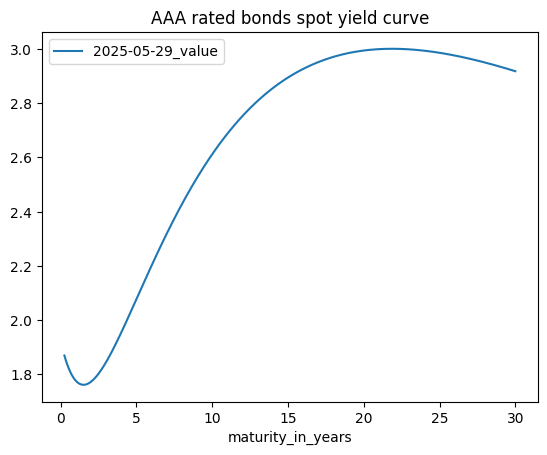

In [144]:
# exactly the same as on the Web:  https://www.ecb.europa.eu/stats/financial_markets_and_interest_rates/euro_area_yield_curves/html/index.en.html
filtered_eurostat_euro_yield_df \
  .sort_values(by='maturity_in_months')[['maturity_in_years','2025-05-29_value']] \
  .plot.line(x='maturity_in_years',
            y='2025-05-29_value',
            title='AAA rated bonds spot yield curve')


*italicized text*## 4) [Code Snippet 5] Fundamental indicators


    Read about "Ratio Analysis" to learn about more ratios: https://www.investopedia.com/terms/r/ratioanalysis.asp
    https://algotrading101.com/learn/yahoo-finance-api-guide/


In [145]:


# let's select some set of stocks: e.g. top US companies on 'Employees':
# https://companiesmarketcap.com/usa/largest-american-companies-by-number-of-employees/

US_TOP_EMPLOYEES_STOCKS = ['WMT','AMZN','UPS','HD','CNXC','TGT','KR','UNH','BRK-B','SBUX']

# WMT
ticker = US_TOP_EMPLOYEES_STOCKS[0]

# WMT ticker
one_company = yf.Ticker(ticker)



In [146]:


# Fundamental info appears close earning dates, you need to download it and use quickly (before/after trading day),
#  unless you're a fundamental long-term investor looking for a several months-quarters-years strategy (period between buy and sell)
# This dfthis is the easiest thing to join with the main dataset and get "some" technical indicators present
# WMT ticker
eps_earnings = one_company.earnings_dates
eps_earnings['Ticker'] = ticker
eps_earnings



EPS Estimate  Reported EPS  Surprise(%) Ticker
Earnings Date                                                            
2026-05-13 09:30:00-04:00           NaN           NaN          NaN    WMT
2026-02-19 09:30:00-05:00           NaN           NaN          NaN    WMT
2025-11-20 09:30:00-05:00           NaN           NaN          NaN    WMT
2025-08-21 09:30:00-04:00           NaN           NaN          NaN    WMT
2025-05-15 07:01:00-04:00          0.58          0.61         5.93    WMT
2025-02-20 06:59:00-05:00          0.64          0.66         2.57    WMT
2024-11-19 07:00:00-05:00          0.53          0.58         8.82    WMT
2024-08-15 07:02:00-04:00          0.65          0.67         3.78    WMT
2024-05-16 07:01:00-04:00          0.52          0.60        14.60    WMT
2024-02-20 07:09:00-05:00          0.55          0.60         9.41    WMT
2023-11-16 07:02:00-05:00          1.52          1.53         0.38    WMT
2023-08-17 07:02:00-04:00          1.71          1.84         7.91    WMT

In [147]:
one_company.calendar

{'Dividend Date': datetime.date(2026, 1, 5),
 'Ex-Dividend Date': datetime.date(2025, 8, 15),
 'Earnings Date': [datetime.date(2025, 8, 21)],
 'Earnings High': None,
 'Earnings Low': None,
 'Earnings Average': None,
 'Revenue High': 176653000000,
 'Revenue Low': 172272000000,
 'Revenue Average': 174085276030}

In [148]:
one_company.financials

2025-01-31  \
Tax Effect Of Unusual Items                                    0.0   
Tax Rate For Calcs                                           0.234   
Normalized EBITDA                                    42010000000.0   
Total Unusual Items                                            NaN   
Total Unusual Items Excluding Goodwill                         NaN   
Net Income From Continuing Operation Net Minori...   19436000000.0   
Reconciled Depreciation                              12973000000.0   
Reconciled Cost Of Revenue                          511753000000.0   
EBITDA                                               42010000000.0   
EBIT                                                 29037000000.0   
Net Interest Income                                  -2245000000.0   
Interest Expense                                      2728000000.0   
Interest Income                                        483000000.0   
Normalized Income                                    19436000000.0   
Net Income From Continuing And Discontinued Ope...   19436000000.0   
Total Expenses                                      651637000000.0   
Total Operating Income As Reported                   29348000000.0   
Diluted Average Shares                                8081000000.0   
Basic Average Shares                                  8041000000.0   
Diluted EPS                                                   2.41   
Basic EPS                                                     2.42   
Diluted NI Availto Com Stockholders                  19436000000.0   
Net Income Common Stockholders                       19436000000.0   
Net Income                                           19436000000.0   
Minority Interests                                    -721000000.0   
Net Income Including Noncontrolling Interests        20157000000.0   
Net Income Continuous Operations                     20157000000.0   
Tax Provision                                         6152000000.0   
Pretax Income                                        26309000000.0   
Other Income Expense                                  -794000000.0   
Other Non Operating Income Expenses                   -794000000.0   
Special Income Charges                                         NaN   
Other Special Charges                                          NaN   
Net Non Operating Interest Income Expense            -2245000000.0   
Interest Expense Non Operating                        2728000000.0   
Interest Income Non Operating                          483000000.0   
Operating Income                                     29348000000.0   
Operating Expense                                   139884000000.0   
Other Operating Expenses                            139884000000.0   
Selling General And Administration                  139884000000.0   
Gross Profit                                        169232000000.0   
Cost Of Revenue                                     511753000000.0   
Total Revenue                                       680985000000.0   
Operating Revenue                                   680985000000.0   

                                                        2024-01-31  \
Tax Effect Of Unusual Items                                    0.0   
Tax Rate For Calcs                                           0.255   
Normalized EBITDA                                    36384000000.0   
Total Unusual Items                                            0.0   
Total Unusual Items Excluding Goodwill                         0.0   
Net Income From Continuing Operation Net Minori...   15511000000.0   
Reconciled Depreciation                              11853000000.0   
Reconciled Cost Of Revenue                          490142000000.0   
EBITDA                                               36384000000.0   
EBIT                                                 24531000000.0   
Net Interest Income                                  -2137000000.0   
Interest Expense                                      2683000000.

In [149]:


EPS = one_company.financials.loc['Basic EPS']
EPS



2025-01-31        2.42
2024-01-31        1.92
2023-01-31        1.43
2022-01-31    1.633333
2021-01-31         NaN
Name: Basic EPS, dtype: object

In [150]:
# or should we use NORMALIZED_EBITDA?
EBITDA = one_company.financials.loc['EBITDA']
EBITDA_margin = one_company.financials.loc['EBITDA'] /  one_company.financials.loc['Total Revenue']


In [151]:
EBITDA_margin

2025-01-31     0.06169
2024-01-31    0.056137
2023-01-31    0.049222
2022-01-31    0.054732
2021-01-31         NaN
dtype: object

In [152]:
NET_INCOME = one_company.financials.loc['Net Income']
NET_INCOME_margin = one_company.financials.loc['Net Income'] /  one_company.financials.loc['Total Revenue']


In [153]:
NET_INCOME

2025-01-31    19436000000.0
2024-01-31    15511000000.0
2023-01-31    11680000000.0
2022-01-31    13673000000.0
2021-01-31              NaN
Name: Net Income, dtype: object

In [154]:


# Compare with Public information - you can fully replicate the numbers (yearly and/or quarterly):
# https://www.wsj.com/market-data/quotes/WMT/financials/annual/income-statement
NET_INCOME_margin



2025-01-31    0.028541
2024-01-31    0.023932
2023-01-31    0.019107
2022-01-31    0.023872
2021-01-31         NaN
dtype: object

In [155]:


# Combine the series into a DataFrame
df_fin_ratios = pd.DataFrame({
    'NET_INCOME_margin': 100.0 * NET_INCOME_margin, #for visualisation -- Margin in %
    'EBITDA_margin': 100.0 *EBITDA_margin, #for visualisation -- Margin in %
    'EPS': EPS
})



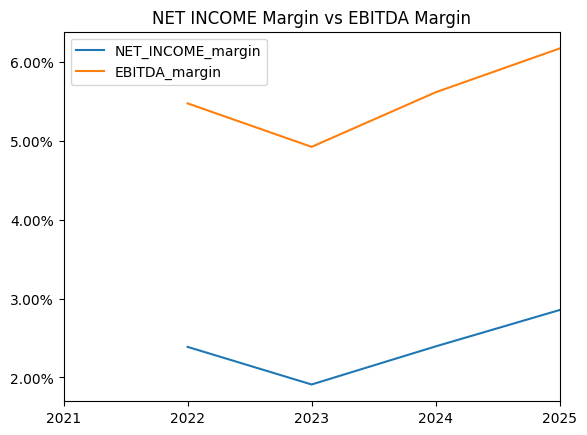

In [156]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# Assuming df_fin_ratios is your DataFrame containing the financial ratios
# Make sure you have already created this DataFrame

# Plotting the specified columns
ax = df_fin_ratios[['NET_INCOME_margin','EBITDA_margin']].plot.line()

# Setting the y-axis formatter to display values as percentages
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

# Adding title
plt.title('NET INCOME Margin vs EBITDA Margin')

# Displaying the plot
plt.show()

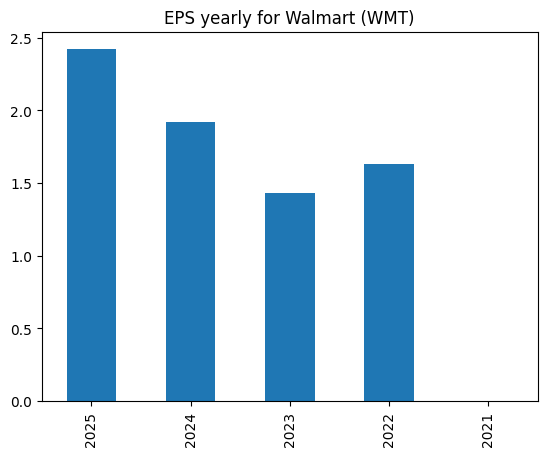

In [157]:


EPS_year = df_fin_ratios['EPS'].index.year

df_fin_ratios['EPS'].plot.bar(title = 'EPS yearly for Walmart (WMT)')

plt.xticks(range(len(EPS_year)), EPS_year)
# Displaying the plot
plt.show()



**bold text**## 5) [Code snippet 7] Daily OHCLV data for a set of stocks

In [158]:
# https://companiesmarketcap.com/usa/largest-companies-in-the-usa-by-market-cap/
US_STOCKS = ['MSFT', 'AAPL', 'GOOG', 'NVDA', 'AMZN', 'META', 'BRK-B', 'LLY', 'AVGO','V', 'JPM']

# You're required to add EU_STOCKS and INDIA_STOCS
# https://companiesmarketcap.com/european-union/largest-companies-in-the-eu-by-market-cap/
EU_STOCKS = ['NVO','MC.PA', 'ASML', 'RMS.PA', 'OR.PA', 'SAP', 'ACN', 'TTE', 'SIE.DE','IDEXY','CDI.PA']

# https://companiesmarketcap.com/india/largest-companies-in-india-by-market-cap/
INDIA_STOCKS = ['RELIANCE.NS','TCS.NS','HDB','BHARTIARTL.NS','IBN','SBIN.NS','LICI.NS','INFY','ITC.NS','HINDUNILVR.NS','LT.NS']


In [159]:
ALL_TICKERS = US_STOCKS  + EU_STOCKS + INDIA_STOCKS
ALL_TICKERS

['MSFT',
 'AAPL',
 'GOOG',
 'NVDA',
 'AMZN',
 'META',
 'BRK-B',
 'LLY',
 'AVGO',
 'V',
 'JPM',
 'NVO',
 'MC.PA',
 'ASML',
 'RMS.PA',
 'OR.PA',
 'SAP',
 'ACN',
 'TTE',
 'SIE.DE',
 'IDEXY',
 'CDI.PA',
 'RELIANCE.NS',
 'TCS.NS',
 'HDB',
 'BHARTIARTL.NS',
 'IBN',
 'SBIN.NS',
 'LICI.NS',
 'INFY',
 'ITC.NS',
 'HINDUNILVR.NS',
 'LT.NS']

In [160]:
import time

stocks_df = pd.DataFrame({'A' : []})

for i,ticker in enumerate(ALL_TICKERS):
  print(i,ticker)

  # Work with stock prices
  ticker_obj = yf.Ticker(ticker)

  # historyPrices = yf.download(tickers = ticker,
  #                    period = "max",
  #                    interval = "1d")
  historyPrices = ticker_obj.history(
                     period = "max",
                     interval = "1d")

  # generate features for historical prices, and what we want to predict
  historyPrices['Ticker'] = ticker
  historyPrices['Year']= historyPrices.index.year
  historyPrices['Month'] = historyPrices.index.month
  historyPrices['Weekday'] = historyPrices.index.weekday
  historyPrices['Date'] = historyPrices.index.date

  # historical returns
  for i in [1,3,7,30,90,365]:
    historyPrices['growth_'+str(i)+'d'] = historyPrices['Close'] / historyPrices['Close'].shift(i)
  historyPrices['growth_future_30d'] = historyPrices['Close'].shift(-30) / historyPrices['Close']

  # Technical indicators
  # SimpleMovingAverage 10 days and 20 days
  historyPrices['SMA10']= historyPrices['Close'].rolling(10).mean()
  historyPrices['SMA20']= historyPrices['Close'].rolling(20).mean()
  historyPrices['growing_moving_average'] = np.where(historyPrices['SMA10'] > historyPrices['SMA20'], 1, 0)
  historyPrices['high_minus_low_relative'] = (historyPrices.High - historyPrices.Low) / historyPrices['Close']

  # 30d rolling volatility : https://ycharts.com/glossary/terms/rolling_vol_30
  historyPrices['volatility'] =   historyPrices['Close'].rolling(30).std() * np.sqrt(252)

  # what we want to predict
  historyPrices['is_positive_growth_30d_future'] = np.where(historyPrices['growth_future_30d'] > 1, 1, 0)

  # sleep 1 sec between downloads - not to overload the API server
  time.sleep(1)


  if stocks_df.empty:
    stocks_df = historyPrices
  else:
    stocks_df = pd.concat([stocks_df, historyPrices], ignore_index=True)

0 MSFT
1 AAPL
2 GOOG
3 NVDA
4 AMZN
5 META
6 BRK-B
7 LLY
8 AVGO
9 V
10 JPM
11 NVO
12 MC.PA
13 ASML
14 RMS.PA
15 OR.PA
16 SAP
17 ACN
18 TTE
19 SIE.DE
20 IDEXY
21 CDI.PA
22 RELIANCE.NS
23 TCS.NS
24 HDB
25 BHARTIARTL.NS
26 IBN
27 SBIN.NS
28 LICI.NS
29 INFY
30 ITC.NS
31 HINDUNILVR.NS
32 LT.NS


In [161]:


def get_ticker_type(ticker:str, us_stocks_list, eu_stocks_list, india_stocks_list):
  if ticker in us_stocks_list:
    return 'US'
  elif ticker in eu_stocks_list:
    return 'EU'
  elif ticker in india_stocks_list:
    return 'INDIA'
  else:
    return 'ERROR'




In [162]:
stocks_df['ticker_type'] = stocks_df.Ticker.apply(lambda x:get_ticker_type(x, US_STOCKS, EU_STOCKS, INDIA_STOCKS))

In [163]:


# count of observations between US-EU-INDIA stocks
stocks_df.ticker_type.value_counts()



ticker_type
US       83819
EU       80193
INDIA    66436
Name: count, dtype: int64

In [164]:


# unique tickers
stocks_df.Ticker.nunique()



33

In [165]:


# count of observations by stock
stocks_df.Ticker.value_counts()



Ticker
LLY              13376
JPM              11410
AAPL             11222
NVO              11127
MSFT              9896
CDI.PA            8616
TTE               8474
ASML              7619
SAP               7490
HINDUNILVR.NS     7403
SBIN.NS           7401
ITC.NS            7400
RELIANCE.NS       7400
SIE.DE            7332
BRK-B             7327
AMZN              7070
NVDA              6645
INFY              6612
MC.PA             6546
RMS.PA            6546
OR.PA             6546
IBN               6347
ACN               6017
HDB               6016
LT.NS             5708
BHARTIARTL.NS     5705
TCS.NS            5676
GOOG              5244
V                 4343
AVGO              3994
IDEXY             3880
META              3292
LICI.NS            768
Name: count, dtype: int64

In [166]:
stocks_df.groupby(['Ticker','ticker_type']).Date.agg(['min','max'])

min         max
Ticker        ticker_type                        
AAPL          US           1980-12-12  2025-06-23
ACN           EU           2001-07-19  2025-06-23
AMZN          US           1997-05-15  2025-06-23
ASML          EU           1995-03-15  2025-06-23
AVGO          US           2009-08-06  2025-06-23
BHARTIARTL.NS INDIA        2002-07-01  2025-06-24
BRK-B         US           1996-05-09  2025-06-23
CDI.PA        EU           1992-01-27  2025-06-23
GOOG          US           2004-08-19  2025-06-23
HDB           INDIA        2001-07-20  2025-06-23
HINDUNILVR.NS INDIA        1996-01-01  2025-06-24
IBN           INDIA        2000-03-28  2025-06-23
IDEXY         EU           2010-01-20  2025-06-23
INFY          INDIA        1999-03-11  2025-06-23
ITC.NS        INDIA        1996-01-01  2025-06-24
JPM           US           1980-03-17  2025-06-23
LICI.NS       INDIA        2022-05-17  2025-06-24
LLY           US           1972-06-01  2025-06-23
LT.NS         INDIA        2002-07-01  2025-06-24
MC.PA         EU           2000-01-03  2025-06-23
META          US           2012-05-18  2025-06-23
MSFT          US           1986-03-13  2025-06-23
NVDA          US           1999-01-22  2025-06-23
NVO           EU           1981-04-30  2025-06-23
OR.PA         EU           2000-01-03  2025-06-23
RELIANCE.NS   INDIA        1996-01-01  2025-06-24
RMS.PA        EU           2000-01-03  2025-06-23
SAP           EU           1995-09-18  2025-06-23
SBIN.NS       INDIA        1996-01-01  2025-06-24
SIE.DE        EU           1996-11-08  2025-06-23
TCS.NS        INDIA        2002-08-12  2025-06-24
TTE           EU           1991-10-25  2025-06-23
V             US           2008-03-19  2025-06-23

In [167]:
#  average growth 365days
stocks_df[stocks_df.Year>=2020].groupby(by=['Year','ticker_type']).growth_365d.mean()

Year  ticker_type
2020  EU             1.245388
      INDIA          1.098703
      US             1.484070
2021  EU             1.582166
      INDIA          1.545082
      US             1.797571
2022  EU             1.191167
      INDIA          1.379889
      US             1.182379
2023  EU             1.246531
      INDIA          1.199860
      US             1.203253
2024  EU             1.406437
      INDIA          1.352715
      US             2.159361
2025  EU             1.164794
      INDIA          1.214415
      US             1.668534
Name: growth_365d, dtype: float64

In [168]:
stocks_df['Date'] = pd.to_datetime(stocks_df['Date'])

In [169]:


# filtering only on stats after 2000
stocks_df[stocks_df.Date>='2000-01-01'].info()



<class 'pandas.core.frame.DataFrame'>
Index: 191981 entries, 3490 to 230447
Data columns (total 26 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   Open                           191981 non-null  float64       
 1   High                           191981 non-null  float64       
 2   Low                            191981 non-null  float64       
 3   Close                          191981 non-null  float64       
 4   Volume                         191981 non-null  int64         
 5   Dividends                      191981 non-null  float64       
 6   Stock Splits                   191981 non-null  float64       
 7   Ticker                         191981 non-null  object        
 8   Year                           191981 non-null  int32         
 9   Month                          191981 non-null  int32         
 10  Weekday                        191981 non-null  int32         
 11  Da

In [170]:
stocks_df[stocks_df.Date=='2025-04-01'].tail()

Open         High          Low        Close    Volume  \
203268   795.000000   806.000000   792.099976   797.750000    726877   
209880    18.190001    18.209999    17.950001    18.200001  13574900   
217280   402.386004   406.902788   398.262008   399.292999  15206240   
224683  2235.491201  2260.874172  2196.897064  2210.603027   2495962   
230391  3447.844234  3469.244743  3398.306242  3405.043457   1935147   

        Dividends  Stock Splits         Ticker  Year  Month  ...  growth_90d  \
203268        0.0           0.0        LICI.NS  2025      4  ...    0.904530   
209880        0.0           0.0           INFY  2025      4  ...    0.842593   
217280        0.0           0.0         ITC.NS  2025      4  ...    0.903574   
224683        0.0           0.0  HINDUNILVR.NS  2025      4  ...    0.937490   
230391        0.0           0.0          LT.NS  2025      4  ...    0.986594   

       growth_365d  growth_future_30d        SMA10        SMA20  \
203268    1.249596           1.071827   786.810004   767.930005   
209880    1.105543           1.014286    18.432000    18.730500   
217280    0.964762           1.070577   400.068704   398.897778   
224683    0.912701           1.066634  2213.789429  2192.072791   
230391    1.119635           1.047544  3377.198193  3277.881909   

        growing_moving_average  high_minus_low_relative   volatility  \
203268                       1                 0.017424   337.725353   
209880                       0                 0.014286    17.068021   
217280                       1                 0.021640    69.909597   
224683                       1                 0.028941   683.812269   
230391                       1                 0.020833  1726.860104   

        is_positive_growth_30d_future  ticker_type  
203268                              1        INDIA  
209880                              1        INDIA  
217280                              1        INDIA  
224683                              1        INDIA  
230391                              1        INDIA  

[5 rows x 26 columns]

## 6) [Code Snippet 8] Technical Indicators with TA-lib

- PythonInvest article on Tech. Indicators
- Code for generating 100+ tech. indicators/patterns : https://github.com/realmistic/PythonInvest-basic-fin-analysis/blob/master/colab_notebooks/Part14_Exploring_Tech_Indicators_For_Stocks_and_Crypto.ipynb

Indicator groups: https://github.com/TA-Lib/ta-lib-python/blob/master/README.md


    Overlap Studies (17)
    Momentum Indicators (30+)
    Volume Indicators (3)
    Cycle Indicators (5)
    Price Transform (4)
    Volatility Indicators (3)
    Pattern Recognition (60)


In [171]:
# [2025 way - seems to be working] https://medium.com/@Tobi_Lux/collaboration-of-colab-yfinance-and-ta-lib-recent-issues-6cd8eebb56b0
url = 'https://anaconda.org/conda-forge/libta-lib/0.4.0/download/linux-64/libta-lib-0.4.0-h166bdaf_1.tar.bz2'
!curl -L $url | tar xj -C /usr/lib/x86_64-linux-gnu/ lib --strip-components=1
!pip install conda-package-handling
!wget https://anaconda.org/conda-forge/ta-lib/0.5.1/download/linux-64/ta-lib-0.5.1-py311h9ecbd09_0.conda
!cph x ta-lib-0.5.1-py311h9ecbd09_0.conda

# üõ† Option 1: Remove the existing directory first (clean, but destructive)
!rm -rf /usr/local/lib/python3.11/dist-packages/talib

!mv ./ta-lib-0.5.1-py311h9ecbd09_0/lib/python3.11/site-packages/talib /usr/local/lib/python3.11/dist-packages/
import talib

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3975    0  3975    0     0   9020      0 --:--:-- --:--:-- --:--:--  9013
100  517k  100  517k    0     0   264k      0  0:00:01  0:00:01 --:--:-- 1120k
--2025-06-24 04:29:26--  https://anaconda.org/conda-forge/ta-lib/0.5.1/download/linux-64/ta-lib-0.5.1-py311h9ecbd09_0.conda
Resolving anaconda.org (anaconda.org)... 104.19.145.37, 104.19.144.37, 2606:4700::6813:9025, ...
Connecting to anaconda.org (anaconda.org)|104.19.145.37|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://binstar-cio-packages-prod.s3.amazonaws.com/5f738b4b78d4370a69f82984/673b62920c609ff6945bb24d?response-content-disposition=attachment%3B%20filename%3D%22ta-lib-0.5.1-py311h9ecbd09_0.conda%22%3B%20filename%2A%3DUTF-8%27%27ta-lib-0.5.1-py311h9ecbd09_0.conda&response-content-type=application%2Foctet-stream&X-Amz-Algorithm=

### 6.1) Momentum indicators

https://github.com/TA-Lib/ta-lib-python/blob/master/docs/func_groups/momentum_indicators.md

In [172]:
def talib_get_momentum_indicators_for_one_ticker(df: pd.DataFrame) -> pd.DataFrame:
  # ADX - Average Directional Movement Index
  talib_momentum_adx = talib.ADX(df.High.values, df.Low.values, df.Close.values, timeperiod=14)
  # ADXR - Average Directional Movement Index Rating
  talib_momentum_adxr = talib.ADXR(df.High.values, df.Low.values, df.Close.values, timeperiod=14 )
  # APO - Absolute Price Oscillator
  talib_momentum_apo = talib.APO(df.Close.values, fastperiod=12, slowperiod=26, matype=0 )
  # AROON - Aroon
  talib_momentum_aroon = talib.AROON(df.High.values, df.Low.values, timeperiod=14 )
  # talib_momentum_aroon[0].size
  # talib_momentum_aroon[1].size
  # AROONOSC - Aroon Oscillator
  talib_momentum_aroonosc = talib.AROONOSC(df.High.values, df.Low.values, timeperiod=14)
  # BOP - Balance of Power
  # https://school.stockcharts.com/doku.php?id=technical_indicators:balance_of_power
     #calculate open prices as shifted closed prices from the prev day
     # open = df.Last.shift(1)
  talib_momentum_bop = talib.BOP(df.Open.values, df.High.values, df.Low.values, df.Close.values)
  # CCI - Commodity Channel Index
  talib_momentum_cci = talib.CCI(df.High.values, df.Low.values, df.Close.values, timeperiod=14)
  # CMO - Chande Momentum Oscillator
  talib_momentum_cmo = talib.CMO(df.Close.values, timeperiod=14)
  # DX - Directional Movement Index
  talib_momentum_dx = talib.DX(df.High.values, df.Low.values, df.Close.values, timeperiod=14)
  # MACD - Moving Average Convergence/Divergence
  talib_momentum_macd, talib_momentum_macdsignal, talib_momentum_macdhist = talib.MACD(df.Close.values, fastperiod=12, \
                                                                                       slowperiod=26, signalperiod=9)
  # MACDEXT - MACD with controllable MA type
  talib_momentum_macd_ext, talib_momentum_macdsignal_ext, talib_momentum_macdhist_ext = talib.MACDEXT(df.Close.values, \
                                                                                                    fastperiod=12, \
                                                                                                    fastmatype=0, \
                                                                                                    slowperiod=26, \
                                                                                                    slowmatype=0, \
                                                                                                    signalperiod=9, \
                                                                                                  signalmatype=0)
  # MACDFIX - Moving Average Convergence/Divergence Fix 12/26
  talib_momentum_macd_fix, talib_momentum_macdsignal_fix, talib_momentum_macdhist_fix = talib.MACDFIX(df.Close.values, \
                                                                                                      signalperiod=9)
  # MFI - Money Flow Index
  talib_momentum_mfi = talib.MFI(df.High.values, df.Low.values, df.Close.values, df.Volume.values, timeperiod=14)
  # MINUS_DI - Minus Directional Indicator
  talib_momentum_minus_di = talib.MINUS_DM(df.High.values, df.Low.values, timeperiod=14)
  # MOM - Momentum
  talib_momentum_mom = talib.MOM(df.Close.values, timeperiod=10)
  # PLUS_DI - Plus Directional Indicator
  talib_momentum_plus_di = talib.PLUS_DI(df.High.values, df.Low.values, df.Close.values, timeperiod=14)
  # PLUS_DM - Plus Directional Movement
  talib_momentum_plus_dm = talib.PLUS_DM(df.High.values, df.Low.values, timeperiod=14)
  # PPO - Percentage Price Oscillator
  talib_momentum_ppo = talib.PPO(df.Close.values, fastperiod=12, slowperiod=26, matype=0)
  # ROC - Rate of change : ((price/prevPrice)-1)*100
  talib_momentum_roc = talib.ROC(df.Close.values, timeperiod=10)
  # ROCP - Rate of change Percentage: (price-prevPrice)/prevPrice
  talib_momentum_rocp = talib.ROCP(df.Close.values, timeperiod=10)
  # ROCR - Rate of change ratio: (price/prevPrice)
  talib_momentum_rocr = talib.ROCR(df.Close.values, timeperiod=10)
  # ROCR100 - Rate of change ratio 100 scale: (price/prevPrice)*100
  talib_momentum_rocr100 = talib.ROCR100(df.Close.values, timeperiod=10)
  # RSI - Relative Strength Index
  talib_momentum_rsi = talib.RSI(df.Close.values, timeperiod=14)
  # STOCH - Stochastic
  talib_momentum_slowk, talib_momentum_slowd = talib.STOCH(df.High.values, df.Low.values, df.Close.values, \
                                                           fastk_period=5, slowk_period=3, slowk_matype=0, slowd_period=3, slowd_matype=0)
  # STOCHF - Stochastic Fast
  talib_momentum_fastk, talib_momentum_fastd = talib.STOCHF(df.High.values, df.Low.values, df.Close.values, \
                                                            fastk_period=5, fastd_period=3, fastd_matype=0)
  # STOCHRSI - Stochastic Relative Strength Index
  talib_momentum_fastk_rsi, talib_momentum_fastd_rsi = talib.STOCHRSI(df.Close.values, timeperiod=14, \
                                                                      fastk_period=5, fastd_period=3, fastd_matype=0)
  # TRIX - 1-day Rate-Of-Change (ROC) of a Triple Smooth EMA
  talib_momentum_trix = talib.TRIX(df.Close.values, timeperiod=30)
  # ULTOSC - Ultimate Oscillator
  talib_momentum_ultosc = talib.ULTOSC(df.High.values, df.Low.values, df.Close.values, timeperiod1=7, timeperiod2=14, timeperiod3=28)
  # WILLR - Williams' %R
  talib_momentum_willr = talib.WILLR(df.High.values, df.Low.values, df.Close.values, timeperiod=14)

  momentum_df =   pd.DataFrame(
    {
      # assume here multi-index
      # 'datetime': df.index.get_level_values(0),
      # 'ticker': df.index.get_level_values(1) ,

      # old way with separate columns
      'Date': df.Date.values,
      'Ticker': df.Ticker,

      'adx': talib_momentum_adx,
      'adxr': talib_momentum_adxr,
      'apo': talib_momentum_apo,
      'aroon_1': talib_momentum_aroon[0] ,
      'aroon_2': talib_momentum_aroon[1],
      'aroonosc': talib_momentum_aroonosc,
      'bop': talib_momentum_bop,
      'cci': talib_momentum_cci,
      'cmo': talib_momentum_cmo,
      'dx': talib_momentum_dx,
      'macd': talib_momentum_macd,
      'macdsignal': talib_momentum_macdsignal,
      'macdhist': talib_momentum_macdhist,
      'macd_ext': talib_momentum_macd_ext,
      'macdsignal_ext': talib_momentum_macdsignal_ext,
      'macdhist_ext': talib_momentum_macdhist_ext,
      'macd_fix': talib_momentum_macd_fix,
      'macdsignal_fix': talib_momentum_macdsignal_fix,
      'macdhist_fix': talib_momentum_macdhist_fix,
      'mfi': talib_momentum_mfi,
      'minus_di': talib_momentum_minus_di,
      'mom': talib_momentum_mom,
      'plus_di': talib_momentum_plus_di,
      'dm': talib_momentum_plus_dm,
      'ppo': talib_momentum_ppo,
      'roc': talib_momentum_roc,
      'rocp': talib_momentum_rocp,
      'rocr': talib_momentum_rocr,
      'rocr100': talib_momentum_rocr100,
      'rsi': talib_momentum_rsi,
      'slowk': talib_momentum_slowk,
      'slowd': talib_momentum_slowd,
      'fastk': talib_momentum_fastk,
      'fastd': talib_momentum_fastd,
      'fastk_rsi': talib_momentum_fastk_rsi,
      'fastd_rsi': talib_momentum_fastd_rsi,
      'trix': talib_momentum_trix,
      'ultosc': talib_momentum_ultosc,
      'willr': talib_momentum_willr,
     }
  )
  return momentum_df

### 6.2 Volume, Volatility, Cycle, Price indicators

https://github.com/TA-Lib/ta-lib-python/blob/master/docs/func_groups/volume_indicators.md

In [173]:
def talib_get_volume_volatility_cycle_price_indicators(df: pd.DataFrame) -> pd.DataFrame:
        # TA-Lib Volume indicators
        # https://github.com/TA-Lib/ta-lib-python/blob/master/docs/func_groups/volume_indicators.md
        # AD - Chaikin A/D Line
        talib_ad = talib.AD(
            df.High.values, df.Low.values, df.Close.values, df.Volume.values)
        # ADOSC - Chaikin A/D Oscillator
        talib_adosc = talib.ADOSC(
            df.High.values, df.Low.values, df.Close.values, df.Volume.values, fastperiod=3, slowperiod=10)
        # OBV - On Balance Volume
        talib_obv = talib.OBV(
            df.Close.values, df.Volume.values)

        # TA-Lib Volatility indicators
        # https://github.com/TA-Lib/ta-lib-python/blob/master/docs/func_groups/volatility_indicators.md
        # ATR - Average True Range
        talib_atr = talib.ATR(
            df.High.values, df.Low.values, df.Close.values, timeperiod=14)
        # NATR - Normalized Average True Range
        talib_natr = talib.NATR(
            df.High.values, df.Low.values, df.Close.values, timeperiod=14)
        # OBV - On Balance Volume
        talib_obv = talib.OBV(
            df.Close.values, df.Volume.values)

        # TA-Lib Cycle Indicators
        # https://github.com/TA-Lib/ta-lib-python/blob/master/docs/func_groups/cycle_indicators.md
        # HT_DCPERIOD - Hilbert Transform - Dominant Cycle Period
        talib_ht_dcperiod = talib.HT_DCPERIOD(df.Close.values)
        # HT_DCPHASE - Hilbert Transform - Dominant Cycle Phase
        talib_ht_dcphase = talib.HT_DCPHASE(df.Close.values)
        # HT_PHASOR - Hilbert Transform - Phasor Components
        talib_ht_phasor_inphase, talib_ht_phasor_quadrature = talib.HT_PHASOR(
            df.Close.values)
        # HT_SINE - Hilbert Transform - SineWave
        talib_ht_sine_sine, talib_ht_sine_leadsine = talib.HT_SINE(
            df.Close.values)
        # HT_TRENDMODE - Hilbert Transform - Trend vs Cycle Mode
        talib_ht_trendmode = talib.HT_TRENDMODE(df.Close.values)

        # TA-Lib Price Transform Functions
        # https://github.com/TA-Lib/ta-lib-python/blob/master/docs/func_groups/price_transform.md
        # AVGPRICE - Average Price
        talib_avgprice = talib.AVGPRICE(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # MEDPRICE - Median Price
        talib_medprice = talib.MEDPRICE(df.High.values, df.Low.values)
        # TYPPRICE - Typical Price
        talib_typprice = talib.TYPPRICE(
            df.High.values, df.Low.values, df.Close.values)
        # WCLPRICE - Weighted Close Price
        talib_wclprice = talib.WCLPRICE(
            df.High.values, df.Low.values, df.Close.values)

        volume_volatility_cycle_price_df = pd.DataFrame(
            {'Date': df.Date.values,
             'Ticker': df.Ticker,
             # TA-Lib Volume indicators
             'ad': talib_ad,
             'adosc': talib_adosc,
             'obv': talib_obv,
             # TA-Lib Volatility indicators
             'atr': talib_atr,
             'natr': talib_natr,
             'obv': talib_obv,
             # TA-Lib Cycle Indicators
             'ht_dcperiod': talib_ht_dcperiod,
             'ht_dcphase': talib_ht_dcphase,
             'ht_phasor_inphase': talib_ht_phasor_inphase,
             'ht_phasor_quadrature': talib_ht_phasor_quadrature,
             'ht_sine_sine': talib_ht_sine_sine,
             'ht_sine_leadsine': talib_ht_sine_leadsine,
             'ht_trendmod': talib_ht_trendmode,
             # TA-Lib Price Transform Functions
             'avgprice': talib_avgprice,
             'medprice': talib_medprice,
             'typprice': talib_typprice,
             'wclprice': talib_wclprice,
             }
        )

        # Need a proper date type
        volume_volatility_cycle_price_df['Date'] = pd.to_datetime(
            volume_volatility_cycle_price_df['Date'])

        return volume_volatility_cycle_price_df

### 6.3) Pattern indicators

https://github.com/TA-Lib/ta-lib-python/blob/master/docs/func_groups/pattern_recognition.md

In [174]:
def talib_get_pattern_recognition_indicators(df: pd.DataFrame) -> pd.DataFrame:
# TA-Lib Pattern Recognition indicators
        # https://github.com/TA-Lib/ta-lib-python/blob/master/docs/func_groups/pattern_recognition.md
        # Nice article about candles (pattern recognition) https://medium.com/analytics-vidhya/recognizing-over-50-candlestick-patterns-with-python-4f02a1822cb5

        # CDL2CROWS - Two Crows
        talib_cdl2crows = talib.CDL2CROWS(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDL3BLACKCROWS - Three Black Crows
        talib_cdl3blackrows = talib.CDL3BLACKCROWS(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDL3INSIDE - Three Inside Up/Down
        talib_cdl3inside = talib.CDL3INSIDE(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDL3LINESTRIKE - Three-Line Strike
        talib_cdl3linestrike = talib.CDL3LINESTRIKE(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDL3OUTSIDE - Three Outside Up/Down
        talib_cdl3outside = talib.CDL3OUTSIDE(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDL3STARSINSOUTH - Three Stars In The South
        talib_cdl3starsinsouth = talib.CDL3STARSINSOUTH(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDL3WHITESOLDIERS - Three Advancing White Soldiers
        talib_cdl3whitesoldiers = talib.CDL3WHITESOLDIERS(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLABANDONEDBABY - Abandoned Baby
        talib_cdlabandonedbaby = talib.CDLABANDONEDBABY(
            df.Open.values, df.High.values, df.Low.values, df.Close.values, penetration=0)
        # CDLADVANCEBLOCK - Advance Block
        talib_cdladvancedblock = talib.CDLADVANCEBLOCK(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLBELTHOLD - Belt-hold
        talib_cdlbelthold = talib.CDLBELTHOLD(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLBREAKAWAY - Breakaway
        talib_cdlbreakaway = talib.CDLBREAKAWAY(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLCLOSINGMARUBOZU - Closing Marubozu
        talib_cdlclosingmarubozu = talib.CDLCLOSINGMARUBOZU(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLCONCEALBABYSWALL - Concealing Baby Swallow
        talib_cdlconcealbabyswall = talib.CDLCONCEALBABYSWALL(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLCOUNTERATTACK - Counterattack
        talib_cdlcounterattack = talib.CDLCOUNTERATTACK(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLDARKCLOUDCOVER - Dark Cloud Cover
        talib_cdldarkcloudcover = talib.CDLDARKCLOUDCOVER(
            df.Open.values, df.High.values, df.Low.values, df.Close.values, penetration=0)
        # CDLDOJI - Doji
        talib_cdldoji = talib.CDLDOJI(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLDOJISTAR - Doji Star
        talib_cdldojistar = talib.CDLDOJISTAR(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLDRAGONFLYDOJI - Dragonfly Doji
        talib_cdldragonflydoji = talib.CDLDRAGONFLYDOJI(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLENGULFING - Engulfing Pattern
        talib_cdlengulfing = talib.CDLENGULFING(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)

        # CDLEVENINGDOJISTAR - Evening Doji Star
        talib_cdleveningdojistar = talib.CDLEVENINGDOJISTAR(
            df.Open.values, df.High.values, df.Low.values, df.Close.values, penetration=0)
        # CDLEVENINGSTAR - Evening Star
        talib_cdleveningstar = talib.CDLEVENINGSTAR(
            df.Open.values, df.High.values, df.Low.values, df.Close.values, penetration=0)
        # CDLGAPSIDESIDEWHITE - Up/Down-gap side-by-side white lines
        talib_cdlgapsidesidewhite = talib.CDLGAPSIDESIDEWHITE(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLGRAVESTONEDOJI - Gravestone Doji
        talib_cdlgravestonedoji = talib.CDLGRAVESTONEDOJI(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLHAMMER - Hammer
        talib_cdlhammer = talib.CDLHAMMER(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLHANGINGMAN - Hanging Man
        talib_cdlhangingman = talib.CDLHANGINGMAN(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLHARAMI - Harami Pattern
        talib_cdlharami = talib.CDLHARAMI(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLHARAMICROSS - Harami Cross Pattern
        talib_cdlharamicross = talib.CDLHARAMICROSS(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLHIGHWAVE - High-Wave Candle
        talib_cdlhighwave = talib.CDLHIGHWAVE(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLHIKKAKE - Hikkake Pattern
        talib_cdlhikkake = talib.CDLHIKKAKE(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLHIKKAKEMOD - Modified Hikkake Pattern
        talib_cdlhikkakemod = talib.CDLHIKKAKEMOD(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)

        # CDLHOMINGPIGEON - Homing Pigeon
        talib_cdlhomingpigeon = talib.CDLHOMINGPIGEON(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLIDENTICAL3CROWS - Identical Three Crows
        talib_cdlidentical3crows = talib.CDLIDENTICAL3CROWS(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLINNECK - In-Neck Pattern
        talib_cdlinneck = talib.CDLINNECK(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLINVERTEDHAMMER - Inverted Hammer
        talib_cdlinvertedhammer = talib.CDLINVERTEDHAMMER(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLKICKING - Kicking
        talib_cdlkicking = talib.CDLKICKING(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLKICKINGBYLENGTH - Kicking - bull/bear determined by the longer marubozu
        talib_cdlkickingbylength = talib.CDLKICKINGBYLENGTH(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLLADDERBOTTOM - Ladder Bottom
        talib_cdlladderbottom = talib.CDLLADDERBOTTOM(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLLONGLEGGEDDOJI - Long Legged Doji
        talib_cdllongleggeddoji = talib.CDLLONGLEGGEDDOJI(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLLONGLINE - Long Line Candle
        talib_cdllongline = talib.CDLLONGLINE(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLMARUBOZU - Marubozu
        talib_cdlmarubozu = talib.CDLMARUBOZU(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLMATCHINGLOW - Matching Low
        talib_cdlmatchinglow = talib.CDLMATCHINGLOW(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)

        # CDLMATHOLD - Mat Hold
        talib_cdlmathold = talib.CDLMATHOLD(
            df.Open.values, df.High.values, df.Low.values, df.Close.values, penetration=0)
        # CDLMORNINGDOJISTAR - Morning Doji Star
        talib_cdlmorningdojistar = talib.CDLMORNINGDOJISTAR(
            df.Open.values, df.High.values, df.Low.values, df.Close.values, penetration=0)
        # CDLMORNINGSTAR - Morning Star
        talib_cdlmorningstar = talib.CDLMORNINGSTAR(
            df.Open.values, df.High.values, df.Low.values, df.Close.values, penetration=0)
        # CDLONNECK - On-Neck Pattern
        talib_cdlonneck = talib.CDLONNECK(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLPIERCING - Piercing Pattern
        talib_cdlpiercing = talib.CDLPIERCING(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLRICKSHAWMAN - Rickshaw Man
        talib_cdlrickshawman = talib.CDLRICKSHAWMAN(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLRISEFALL3METHODS - Rising/Falling Three Methods
        talib_cdlrisefall3methods = talib.CDLRISEFALL3METHODS(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLSEPARATINGLINES - Separating Lines
        talib_cdlseparatinglines = talib.CDLSEPARATINGLINES(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLSHOOTINGSTAR - Shooting Star
        talib_cdlshootingstar = talib.CDLSHOOTINGSTAR(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLSHORTLINE - Short Line Candle
        talib_cdlshortline = talib.CDLSHORTLINE(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLSPINNINGTOP - Spinning Top
        talib_cdlspinningtop = talib.CDLSPINNINGTOP(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)

        # CDLSTALLEDPATTERN - Stalled Pattern
        talib_cdlstalledpattern = talib.CDLSTALLEDPATTERN(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLSTICKSANDWICH - Stick Sandwich
        talib_cdlsticksandwich = talib.CDLSTICKSANDWICH(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLTAKURI - Takuri (Dragonfly Doji with very long lower shadow)
        talib_cdltakuru = talib.CDLTAKURI(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLTASUKIGAP - Tasuki Gap
        talib_cdltasukigap = talib.CDLTASUKIGAP(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLTHRUSTING - Thrusting Pattern
        talib_cdlthrusting = talib.CDLTHRUSTING(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLTRISTAR - Tristar Pattern
        talib_cdltristar = talib.CDLTRISTAR(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLUNIQUE3RIVER - Unique 3 River
        talib_cdlunique3river = talib.CDLUNIQUE3RIVER(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLUPSIDEGAP2CROWS - Upside Gap Two Crows
        talib_cdlupsidegap2crows = talib.CDLUPSIDEGAP2CROWS(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLXSIDEGAP3METHODS - Upside/Downside Gap Three Methods
        talib_cdlxsidegap3methods = talib.CDLXSIDEGAP3METHODS(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)

        pattern_indicators_df = pd.DataFrame(
            {'Date': df.Date.values,
             'Ticker': df.Ticker,
             # TA-Lib Pattern Recognition indicators
             'cdl2crows': talib_cdl2crows,
             'cdl3blackrows': talib_cdl3blackrows,
             'cdl3inside': talib_cdl3inside,
             'cdl3linestrike': talib_cdl3linestrike,
             'cdl3outside': talib_cdl3outside,
             'cdl3starsinsouth': talib_cdl3starsinsouth,
             'cdl3whitesoldiers': talib_cdl3whitesoldiers,
             'cdlabandonedbaby': talib_cdlabandonedbaby,
             'cdladvancedblock': talib_cdladvancedblock,
             'cdlbelthold': talib_cdlbelthold,
             'cdlbreakaway': talib_cdlbreakaway,
             'cdlclosingmarubozu': talib_cdlclosingmarubozu,
             'cdlconcealbabyswall': talib_cdlconcealbabyswall,
             'cdlcounterattack': talib_cdlcounterattack,
             'cdldarkcloudcover': talib_cdldarkcloudcover,
             'cdldoji': talib_cdldoji,
             'cdldojistar': talib_cdldojistar,
             'cdldragonflydoji': talib_cdldragonflydoji,
             'cdlengulfing': talib_cdlengulfing,
             'cdleveningdojistar': talib_cdleveningdojistar,
             'cdleveningstar': talib_cdleveningstar,
             'cdlgapsidesidewhite': talib_cdlgapsidesidewhite,
             'cdlgravestonedoji': talib_cdlgravestonedoji,
             'cdlhammer': talib_cdlhammer,
             'cdlhangingman': talib_cdlhangingman,
             'cdlharami': talib_cdlharami,
             'cdlharamicross': talib_cdlharamicross,
             'cdlhighwave': talib_cdlhighwave,
             'cdlhikkake': talib_cdlhikkake,
             'cdlhikkakemod': talib_cdlhikkakemod,
             'cdlhomingpigeon': talib_cdlhomingpigeon,
             'cdlidentical3crows': talib_cdlidentical3crows,
             'cdlinneck': talib_cdlinneck,
             'cdlinvertedhammer': talib_cdlinvertedhammer,
             'cdlkicking': talib_cdlkicking,
             'cdlkickingbylength': talib_cdlkickingbylength,
             'cdlladderbottom': talib_cdlladderbottom,
             'cdllongleggeddoji': talib_cdllongleggeddoji,
             'cdllongline': talib_cdllongline,
             'cdlmarubozu': talib_cdlmarubozu,
             'cdlmatchinglow': talib_cdlmatchinglow,
             'cdlmathold': talib_cdlmathold,
             'cdlmorningdojistar': talib_cdlmorningdojistar,
             'cdlmorningstar': talib_cdlmorningstar,
             'cdlonneck': talib_cdlonneck,
             'cdlpiercing': talib_cdlpiercing,
             'cdlrickshawman': talib_cdlrickshawman,
             'cdlrisefall3methods': talib_cdlrisefall3methods,
             'cdlseparatinglines': talib_cdlseparatinglines,
             'cdlshootingstar': talib_cdlshootingstar,
             'cdlshortline': talib_cdlshortline,
             'cdlspinningtop': talib_cdlspinningtop,
             'cdlstalledpattern': talib_cdlstalledpattern,
             'cdlsticksandwich': talib_cdlsticksandwich,
             'cdltakuru': talib_cdltakuru,
             'cdltasukigap': talib_cdltasukigap,
             'cdlthrusting': talib_cdlthrusting,
             'cdltristar': talib_cdltristar,
             'cdlunique3river': talib_cdlunique3river,
             'cdlupsidegap2crows': talib_cdlupsidegap2crows,
             'cdlxsidegap3methods': talib_cdlxsidegap3methods
             }
        )

        # Need a proper date type
        pattern_indicators_df['Date'] = pd.to_datetime(
            pattern_indicators_df['Date'])

        return pattern_indicators_df

### 6.4) Calculate Tech Indicators and Merge to the original dataframe

In [175]:


# Volume needs to be float, not int
stocks_df['Volume'] = stocks_df['Volume']*1.0



In [176]:
# to resolve an error "Exception: input array type is not double"
# https://stackoverflow.com/questions/51712269/how-to-run-ta-lib-on-multiple-columns-of-a-pandas-dataframe
for f in ['Open','High','Low','Close', 'Volume', 'Close']:
  stocks_df.loc[:,f] = stocks_df.loc[:,f].astype('float64')

In [177]:
stocks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230448 entries, 0 to 230447
Data columns (total 26 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   Open                           230448 non-null  float64       
 1   High                           230448 non-null  float64       
 2   Low                            230448 non-null  float64       
 3   Close                          230448 non-null  float64       
 4   Volume                         230448 non-null  float64       
 5   Dividends                      230448 non-null  float64       
 6   Stock Splits                   230448 non-null  float64       
 7   Ticker                         230448 non-null  object        
 8   Year                           230448 non-null  int32         
 9   Month                          230448 non-null  int32         
 10  Weekday                        230448 non-null  int32         
 11  

In [178]:
import pandas as pd
# supress warnings
pd.options.mode.chained_assignment = None  # default='warn'

# adding Momentum / Pattern/ Volume features to all tickers - one by one
merged_df_with_tech_ind = pd.DataFrame({'A' : []})

current_ticker_data = None
i=0
for ticker in ALL_TICKERS:
  i+=1
  print(f'{i}/{len(ALL_TICKERS)} Current ticker is {ticker}')
  current_ticker_data = stocks_df[stocks_df.Ticker.isin([ticker])]
  # need to have same 'utc' time on both sides
  # https://stackoverflow.com/questions/73964894/you-are-trying-to-merge-on-datetime64ns-utc-and-datetime64ns-columns-if-yo
  current_ticker_data['Date']= pd.to_datetime(current_ticker_data['Date'], utc=True)

  # 3 calls to get additional features
  df_current_ticker_momentum_indicators = talib_get_momentum_indicators_for_one_ticker(current_ticker_data)
  df_current_ticker_momentum_indicators["Date"]= pd.to_datetime(df_current_ticker_momentum_indicators['Date'], utc=True)
  # df_current_ticker_momentum_indicators.loc[:,"Date"]= pd.to_datetime(df_current_ticker_momentum_indicators['Date'], utc=True)

  df_current_ticker_volume_indicators = talib_get_volume_volatility_cycle_price_indicators(current_ticker_data)
  df_current_ticker_volume_indicators["Date"]= pd.to_datetime(df_current_ticker_volume_indicators['Date'], utc=True)
  # df_current_ticker_volume_indicators.loc[:,"Date"]= pd.to_datetime(df_current_ticker_volume_indicators['Date'], utc=True)

  df_current_ticker_pattern_indicators = talib_get_pattern_recognition_indicators(current_ticker_data)
  df_current_ticker_pattern_indicators["Date"]= pd.to_datetime(df_current_ticker_pattern_indicators['Date'], utc=True)
  # df_current_ticker_pattern_indicators.loc[:,"Date"]= pd.to_datetime(df_current_ticker_pattern_indicators['Date'], utc=True)

  # merge to one df
  m1 = pd.merge(current_ticker_data, df_current_ticker_momentum_indicators.reset_index(), how = 'left', on = ["Date","Ticker"], validate = "one_to_one")
  m2 = pd.merge(m1, df_current_ticker_volume_indicators.reset_index(), how = 'left', on = ["Date","Ticker"], validate = "one_to_one")
  m3 = pd.merge(m2, df_current_ticker_pattern_indicators.reset_index(), how = 'left', on = ["Date","Ticker"], validate = "one_to_one")

  if merged_df_with_tech_ind.empty:
    merged_df_with_tech_ind = m3
  else:
    merged_df_with_tech_ind = pd.concat([merged_df_with_tech_ind,m3], ignore_index = False)

1/33 Current ticker is MSFT
2/33 Current ticker is AAPL
3/33 Current ticker is GOOG
4/33 Current ticker is NVDA
5/33 Current ticker is AMZN
6/33 Current ticker is META
7/33 Current ticker is BRK-B
8/33 Current ticker is LLY
9/33 Current ticker is AVGO
10/33 Current ticker is V
11/33 Current ticker is JPM
12/33 Current ticker is NVO
13/33 Current ticker is MC.PA
14/33 Current ticker is ASML
15/33 Current ticker is RMS.PA
16/33 Current ticker is OR.PA
17/33 Current ticker is SAP
18/33 Current ticker is ACN
19/33 Current ticker is TTE
20/33 Current ticker is SIE.DE
21/33 Current ticker is IDEXY
22/33 Current ticker is CDI.PA
23/33 Current ticker is RELIANCE.NS
24/33 Current ticker is TCS.NS
25/33 Current ticker is HDB
26/33 Current ticker is BHARTIARTL.NS
27/33 Current ticker is IBN
28/33 Current ticker is SBIN.NS
29/33 Current ticker is LICI.NS
30/33 Current ticker is INFY
31/33 Current ticker is ITC.NS
32/33 Current ticker is HINDUNILVR.NS
33/33 Current ticker is LT.NS


In [179]:
merged_df_with_tech_ind[merged_df_with_tech_ind.Date=='2024-04-01'].tail()

Open         High          Low        Close      Volume  \
463    919.998455   979.127016   919.003862   965.351868   4863536.0   
6304    17.336117    17.365189    16.958192    17.035715  14601600.0   
7095   407.560804   409.697862   404.378955   405.281281   9382308.0   
7098  2215.878840  2240.282792  2208.069575  2231.399658   1427873.0   
5403  3716.697971  3786.493268  3716.697971  3772.878174   1905190.0   

      Dividends  Stock Splits         Ticker  Year  Month  ...  \
463         0.0           0.0        LICI.NS  2024      4  ...   
6304        0.0           0.0           INFY  2024      4  ...   
7095        0.0           0.0         ITC.NS  2024      4  ...   
7098        0.0           0.0  HINDUNILVR.NS  2024      4  ...   
5403        0.0           0.0          LT.NS  2024      4  ...   

      cdlspinningtop cdlstalledpattern  cdlsticksandwich  cdltakuru  \
463                0                 0                 0          0   
6304               0                 0                 0          0   
7095               0                 0                 0          0   
7098               0                 0                 0          0   
5403               0                 0                 0          0   

      cdltasukigap  cdlthrusting  cdltristar  cdlunique3river  \
463              0             0           0                0   
6304             0             0           0                0   
7095             0             0           0                0   
7098             0             0           0                0   
5403             0             0           0                0   

      cdlupsidegap2crows  cdlxsidegap3methods  
463                    0                    0  
6304                   0                    0  
7095                   0                    0  
7098                   0                    0  
5403                   0                    0  

[5 rows x 145 columns]

In [180]:
merged_df_with_tech_ind.info()

<class 'pandas.core.frame.DataFrame'>
Index: 230448 entries, 0 to 5707
Columns: 145 entries, Open to cdlxsidegap3methods
dtypes: datetime64[ns, UTC](1), float64(72), int32(65), int64(5), object(2)
memory usage: 199.6+ MB


## 7) [Code snippet 9] Merge All Together

In [181]:
merged_df_with_tech_ind.head(1)

Open      High       Low     Close        Volume  Dividends  \
0  0.054277  0.062259  0.054277  0.059598  1.031789e+09        0.0   

   Stock Splits Ticker  Year  Month  ...  cdlspinningtop cdlstalledpattern  \
0           0.0   MSFT  1986      3  ...               0                 0   

   cdlsticksandwich  cdltakuru  cdltasukigap  cdlthrusting  cdltristar  \
0                 0          0             0             0           0   

   cdlunique3river  cdlupsidegap2crows  cdlxsidegap3methods  
0                0                   0                    0  

[1 rows x 145 columns]

In [182]:
merged_df_with_tech_ind.shape

(230448, 145)

In [183]:
# make sure it is dateTime with no timezone
merged_df_with_tech_ind['Date'] = pd.to_datetime(merged_df_with_tech_ind['Date']).dt.tz_localize(None)


In [184]:


# merge with dax_daily_to_merge
dax_daily_to_merge.tail(1)



growth_dax_1d  growth_dax_3d  growth_dax_7d  \
Date                                                                     
2025-06-23 00:00:00+02:00       0.996508       0.997907       0.978864   

                           growth_dax_30d  growth_dax_90d  growth_dax_365d  
Date                                                                        
2025-06-23 00:00:00+02:00        0.987375        1.050613         1.392973

In [185]:
dax_daily_to_merge.index = dax_daily_to_merge.index.tz_localize(None)

In [186]:


m2 = pd.merge(merged_df_with_tech_ind,
              dax_daily_to_merge,
              how='left',
              left_on='Date',
              right_index=True,
              validate = "many_to_one"
)



In [187]:
m2.tail(1)

Open    High          Low        Close    Volume  Dividends  \
5707  3637.100098  3664.0  3615.699951  3653.600098  414414.0        0.0   

      Stock Splits Ticker  Year  Month  ...  cdltristar cdlunique3river  \
5707           0.0  LT.NS  2025      6  ...           0               0   

      cdlupsidegap2crows  cdlxsidegap3methods  growth_dax_1d  growth_dax_3d  \
5707                   0                    0            NaN            NaN   

      growth_dax_7d  growth_dax_30d  growth_dax_90d  growth_dax_365d  
5707            NaN             NaN             NaN              NaN  

[1 rows x 151 columns]

In [188]:


# check the same number of records, but columns increased
m2.shape



(230448, 151)

In [189]:


# merge with dax_daily_to_merge
snp500_to_merge.tail(1)



growth_snp500_1d  growth_snp500_3d  \
Date                                                            
2025-06-23 00:00:00-04:00          1.009607          1.007095   

                           growth_snp500_7d  growth_snp500_30d  \
Date                                                             
2025-06-23 00:00:00-04:00          1.000486           1.063777   

                           growth_snp500_90d  growth_snp500_365d  
Date                                                              
2025-06-23 00:00:00-04:00            0.99286            1.282704

In [190]:
snp500_to_merge.index = snp500_to_merge.index.tz_localize(None)

In [191]:


m3 = pd.merge(m2,
              snp500_to_merge,
              how='left',
              left_on='Date',
              right_index=True,
              validate = "many_to_one"
              )



In [192]:
m3.tail(1)

Open    High          Low        Close    Volume  Dividends  \
5707  3637.100098  3664.0  3615.699951  3653.600098  414414.0        0.0   

      Stock Splits Ticker  Year  Month  ...  growth_dax_7d growth_dax_30d  \
5707           0.0  LT.NS  2025      6  ...            NaN            NaN   

      growth_dax_90d  growth_dax_365d  growth_snp500_1d  growth_snp500_3d  \
5707             NaN              NaN               NaN               NaN   

      growth_snp500_7d  growth_snp500_30d  growth_snp500_90d  \
5707               NaN                NaN                NaN   

      growth_snp500_365d  
5707                 NaN  

[1 rows x 157 columns]

In [193]:


m3.shape



(230448, 157)

In [194]:


dji_daily_to_merge.index = dji_daily_to_merge.index.tz_localize(None)



In [195]:
m4 = pd.merge(m3,
              dji_daily_to_merge,
              how='left',
              left_on='Date',
              right_index=True,
              validate = "many_to_one"
              )

In [196]:
m4.shape

(230448, 163)

In [197]:
m4.tail(1)

Open    High          Low        Close    Volume  Dividends  \
5707  3637.100098  3664.0  3615.699951  3653.600098  414414.0        0.0   

      Stock Splits Ticker  Year  Month  ...  growth_snp500_7d  \
5707           0.0  LT.NS  2025      6  ...               NaN   

     growth_snp500_30d  growth_snp500_90d  growth_snp500_365d  growth_dji_1d  \
5707               NaN                NaN                 NaN            NaN   

      growth_dji_3d  growth_dji_7d  growth_dji_30d  growth_dji_90d  \
5707            NaN            NaN             NaN             NaN   

      growth_dji_365d  
5707              NaN  

[1 rows x 163 columns]

In [198]:
epi_etf_daily_to_merge.index = epi_etf_daily_to_merge.index.tz_localize(None)

In [199]:
m5 = pd.merge(m4,
              epi_etf_daily_to_merge,
              how='left',
              left_on='Date',
              right_index=True,
              validate = "many_to_one"
              )

In [200]:
m5.shape

(230448, 169)

In [201]:
# define quarter as the first date of qtr
m5['Quarter'] = m5['Date'].dt.to_period('Q').dt.to_timestamp()
m5['Quarter']

0      1986-01-01
1      1986-01-01
2      1986-01-01
3      1986-01-01
4      1986-01-01
          ...    
5703   2025-04-01
5704   2025-04-01
5705   2025-04-01
5706   2025-04-01
5707   2025-04-01
Name: Quarter, Length: 230448, dtype: datetime64[ns]

In [202]:
gdppot_to_merge.tail(1)

gdppot_us_yoy  gdppot_us_qoq
DATE                                    
2025-04-01       0.023029       0.005716

In [203]:
m6 = pd.merge(m5,
              gdppot_to_merge,
              how='left',
              left_on='Quarter',
              right_index=True,
              validate = "many_to_one"
              )

In [204]:


m6.tail(2)



Open    High          Low        Close     Volume  Dividends  \
5706  3645.000000  3660.0  3574.600098  3583.699951  1867977.0        0.0   
5707  3637.100098  3664.0  3615.699951  3653.600098   414414.0        0.0   

      Stock Splits Ticker  Year  Month  ...  growth_dji_365d growth_epi_1d  \
5706           0.0  LT.NS  2025      6  ...         1.136541      1.006757   
5707           0.0  LT.NS  2025      6  ...              NaN           NaN   

      growth_epi_3d  growth_epi_7d  growth_epi_30d  growth_epi_90d  \
5706       1.005223       0.976326        1.060133        1.080974   
5707            NaN            NaN             NaN             NaN   

      growth_epi_365d    Quarter  gdppot_us_yoy  gdppot_us_qoq  
5706         1.117292 2025-04-01       0.023029       0.005716  
5707              NaN 2025-04-01       0.023029       0.005716  

[2 rows x 172 columns]

In [205]:


m6.shape



(230448, 172)

In [206]:
m6['Month'] = m6['Date'].dt.to_period('M').dt.to_timestamp()
m6['Month']

0      1986-03-01
1      1986-03-01
2      1986-03-01
3      1986-03-01
4      1986-03-01
          ...    
5703   2025-06-01
5704   2025-06-01
5705   2025-06-01
5706   2025-06-01
5707   2025-06-01
Name: Month, Length: 230448, dtype: datetime64[ns]

In [207]:


cpilfesl_to_merge.tail(1)



cpi_core_yoy  cpi_core_mom
DATE                                  
2025-05-01      0.027671      0.001299

In [208]:


m7 = pd.merge(m6,
              cpilfesl_to_merge,
              how='left',
              left_on='Month',
              right_index=True,
              validate = "many_to_one"
              )



In [212]:


# PROBLEM! Last month is not defined
m7.tail(1)



Open    High          Low        Close    Volume  Dividends  \
5707  3637.100098  3664.0  3615.699951  3653.600098  414414.0        0.0   

      Stock Splits Ticker  Year      Month  ...  growth_epi_3d growth_epi_7d  \
5707           0.0  LT.NS  2025 2025-06-01  ...            NaN           NaN   

      growth_epi_30d  growth_epi_90d  growth_epi_365d    Quarter  \
5707             NaN             NaN              NaN 2025-04-01   

      gdppot_us_yoy  gdppot_us_qoq  cpi_core_yoy  cpi_core_mom  
5707       0.023029       0.005716      0.027671      0.001299  

[1 rows x 174 columns]

In [210]:


fields_to_fill = ['cpi_core_yoy',	'cpi_core_mom']
# Fill missing values in selected fields with the last defined value
for field in fields_to_fill:
    m7[field] = m7[field].ffill()




In [213]:
m7.tail(1)

Open    High          Low        Close    Volume  Dividends  \
5707  3637.100098  3664.0  3615.699951  3653.600098  414414.0        0.0   

      Stock Splits Ticker  Year      Month  ...  growth_epi_3d growth_epi_7d  \
5707           0.0  LT.NS  2025 2025-06-01  ...            NaN           NaN   

      growth_epi_30d  growth_epi_90d  growth_epi_365d    Quarter  \
5707             NaN             NaN              NaN 2025-04-01   

      gdppot_us_yoy  gdppot_us_qoq  cpi_core_yoy  cpi_core_mom  
5707       0.023029       0.005716      0.027671      0.001299  

[1 rows x 174 columns]

In [214]:


fedfunds.tail(1)



FEDFUNDS
DATE                
2025-05-01      4.33

In [215]:
m8 = pd.merge(m7,
              fedfunds,
              how='left',
              left_on='Month',
              right_index=True,
              validate = "many_to_one"
              )

In [216]:


m8.tail(1)



Open    High          Low        Close    Volume  Dividends  \
5707  3637.100098  3664.0  3615.699951  3653.600098  414414.0        0.0   

      Stock Splits Ticker  Year      Month  ...  growth_epi_7d growth_epi_30d  \
5707           0.0  LT.NS  2025 2025-06-01  ...            NaN            NaN   

      growth_epi_90d  growth_epi_365d    Quarter  gdppot_us_yoy  \
5707             NaN              NaN 2025-04-01       0.023029   

      gdppot_us_qoq  cpi_core_yoy  cpi_core_mom  FEDFUNDS  
5707       0.005716      0.027671      0.001299       NaN  

[1 rows x 175 columns]

In [217]:
fields_to_fill = ['FEDFUNDS']
# Fill missing values in selected fields with the last defined value
for field in fields_to_fill:
    m8[field] = m8[field].ffill()

In [218]:


m8.tail(1)



Open    High          Low        Close    Volume  Dividends  \
5707  3637.100098  3664.0  3615.699951  3653.600098  414414.0        0.0   

      Stock Splits Ticker  Year      Month  ...  growth_epi_7d growth_epi_30d  \
5707           0.0  LT.NS  2025 2025-06-01  ...            NaN            NaN   

      growth_epi_90d  growth_epi_365d    Quarter  gdppot_us_yoy  \
5707             NaN              NaN 2025-04-01       0.023029   

      gdppot_us_qoq  cpi_core_yoy  cpi_core_mom  FEDFUNDS  
5707       0.005716      0.027671      0.001299      4.33  

[1 rows x 175 columns]

In [222]:


dgs1.tail(1)



DGS1
DATE            
2025-06-20  4.07

In [223]:


m9 = pd.merge(m8,
              dgs1,
              how='left',
              left_on='Date',
              right_index=True,
              validate = "many_to_one"
              )



In [224]:
# fix last day later
m9.tail(2)

Open    High          Low        Close     Volume  Dividends  \
5706  3645.000000  3660.0  3574.600098  3583.699951  1867977.0        0.0   
5707  3637.100098  3664.0  3615.699951  3653.600098   414414.0        0.0   

      Stock Splits Ticker  Year      Month  ...  growth_epi_30d  \
5706           0.0  LT.NS  2025 2025-06-01  ...        1.060133   
5707           0.0  LT.NS  2025 2025-06-01  ...             NaN   

     growth_epi_90d  growth_epi_365d    Quarter  gdppot_us_yoy  gdppot_us_qoq  \
5706       1.080974         1.117292 2025-04-01       0.023029       0.005716   
5707            NaN              NaN 2025-04-01       0.023029       0.005716   

      cpi_core_yoy  cpi_core_mom  FEDFUNDS  DGS1  
5706      0.027671      0.001299      4.33   NaN  
5707      0.027671      0.001299      4.33   NaN  

[2 rows x 176 columns]

In [225]:


m10 = pd.merge(m9,
              dgs5,
              how='left',
              left_on='Date',
              right_index=True,
              validate = "many_to_one"
              )



In [226]:


# fix last day later
m10.tail(2)



Open    High          Low        Close     Volume  Dividends  \
5706  3645.000000  3660.0  3574.600098  3583.699951  1867977.0        0.0   
5707  3637.100098  3664.0  3615.699951  3653.600098   414414.0        0.0   

      Stock Splits Ticker  Year      Month  ...  growth_epi_90d  \
5706           0.0  LT.NS  2025 2025-06-01  ...        1.080974   
5707           0.0  LT.NS  2025 2025-06-01  ...             NaN   

     growth_epi_365d    Quarter  gdppot_us_yoy  gdppot_us_qoq  cpi_core_yoy  \
5706        1.117292 2025-04-01       0.023029       0.005716      0.027671   
5707             NaN 2025-04-01       0.023029       0.005716      0.027671   

      cpi_core_mom  FEDFUNDS  DGS1  DGS5  
5706      0.001299      4.33   NaN   NaN  
5707      0.001299      4.33   NaN   NaN  

[2 rows x 177 columns]

In [227]:


m11 = pd.merge(m10,
              dgs10,
              how='left',
              left_on='Date',
              right_index=True,
              validate = "many_to_one"
              )



In [228]:


m11.tail(2)



Open    High          Low        Close     Volume  Dividends  \
5706  3645.000000  3660.0  3574.600098  3583.699951  1867977.0        0.0   
5707  3637.100098  3664.0  3615.699951  3653.600098   414414.0        0.0   

      Stock Splits Ticker  Year      Month  ...  growth_epi_365d    Quarter  \
5706           0.0  LT.NS  2025 2025-06-01  ...         1.117292 2025-04-01   
5707           0.0  LT.NS  2025 2025-06-01  ...              NaN 2025-04-01   

      gdppot_us_yoy  gdppot_us_qoq  cpi_core_yoy  cpi_core_mom  FEDFUNDS  \
5706       0.023029       0.005716      0.027671      0.001299      4.33   
5707       0.023029       0.005716      0.027671      0.001299      4.33   

      DGS1  DGS5  DGS10  
5706   NaN   NaN    NaN  
5707   NaN   NaN    NaN  

[2 rows x 178 columns]

In [229]:


vix_to_merge



Date
1990-01-02 00:00:00-06:00    17.240000
1990-01-03 00:00:00-06:00    18.190001
1990-01-04 00:00:00-06:00    19.219999
1990-01-05 00:00:00-06:00    20.110001
1990-01-08 00:00:00-06:00    20.260000
                               ...    
2025-06-16 00:00:00-05:00    19.110001
2025-06-17 00:00:00-05:00    21.600000
2025-06-18 00:00:00-05:00    20.139999
2025-06-20 00:00:00-05:00    20.620001
2025-06-23 00:00:00-05:00    19.830000
Name: Close, Length: 8934, dtype: float64

In [230]:
vix_to_merge.index = vix_to_merge.index.tz_localize(None)

In [231]:


m12 = pd.merge(m11,
              vix_to_merge,
              how='left',
              left_on='Date',
              right_index=True,
              validate = "many_to_one"
              )



In [232]:


m12.tail(2)



Open    High          Low      Close_x     Volume  Dividends  \
5706  3645.000000  3660.0  3574.600098  3583.699951  1867977.0        0.0   
5707  3637.100098  3664.0  3615.699951  3653.600098   414414.0        0.0   

      Stock Splits Ticker  Year      Month  ...    Quarter gdppot_us_yoy  \
5706           0.0  LT.NS  2025 2025-06-01  ... 2025-04-01      0.023029   
5707           0.0  LT.NS  2025 2025-06-01  ... 2025-04-01      0.023029   

      gdppot_us_qoq  cpi_core_yoy  cpi_core_mom  FEDFUNDS  DGS1  DGS5  DGS10  \
5706       0.005716      0.027671      0.001299      4.33   NaN   NaN    NaN   
5707       0.005716      0.027671      0.001299      4.33   NaN   NaN    NaN   

      Close_y  
5706    19.83  
5707      NaN  

[2 rows x 179 columns]

In [233]:
gold_to_merge.tail(2)

growth_gold_1d  growth_gold_3d  growth_gold_7d  \
Date                                                                        
2025-06-23 00:00:00-04:00        1.002850        0.997372        1.016981   
2025-06-24 00:00:00-04:00        0.995944        0.992389        0.995001   

                           growth_gold_30d  growth_gold_90d  growth_gold_365d  
Date                                                                           
2025-06-23 00:00:00-04:00         1.024601         1.159725          1.666683  
2025-06-24 00:00:00-04:00         1.008575         1.156411          1.660087

In [234]:
gold_to_merge.index = gold_to_merge.index.tz_localize(None)

In [235]:


m13 = pd.merge(m12,
              gold_to_merge,
              how='left',
              left_on='Date',
              right_index=True,
              validate = "many_to_one"
              )



In [236]:
m13.tail(2)

Open    High          Low      Close_x     Volume  Dividends  \
5706  3645.000000  3660.0  3574.600098  3583.699951  1867977.0        0.0   
5707  3637.100098  3664.0  3615.699951  3653.600098   414414.0        0.0   

      Stock Splits Ticker  Year      Month  ...  DGS1 DGS5  DGS10  Close_y  \
5706           0.0  LT.NS  2025 2025-06-01  ...   NaN  NaN    NaN    19.83   
5707           0.0  LT.NS  2025 2025-06-01  ...   NaN  NaN    NaN      NaN   

      growth_gold_1d  growth_gold_3d  growth_gold_7d  growth_gold_30d  \
5706        1.002850        0.997372        1.016981         1.024601   
5707        0.995944        0.992389        0.995001         1.008575   

      growth_gold_90d  growth_gold_365d  
5706         1.159725          1.666683  
5707         1.156411          1.660087  

[2 rows x 185 columns]

In [237]:
crude_oil_to_merge.index = crude_oil_to_merge.index.tz_localize(None)

In [238]:


m14 = pd.merge(m13,
              crude_oil_to_merge,
              how='left',
              left_on='Date',
              right_index=True,
              validate = "many_to_one"
              )



In [239]:
m14.tail(2)

Open    High          Low      Close_x     Volume  Dividends  \
5706  3645.000000  3660.0  3574.600098  3583.699951  1867977.0        0.0   
5707  3637.100098  3664.0  3615.699951  3653.600098   414414.0        0.0   

      Stock Splits Ticker  Year      Month  ...  growth_gold_7d  \
5706           0.0  LT.NS  2025 2025-06-01  ...        1.016981   
5707           0.0  LT.NS  2025 2025-06-01  ...        0.995001   

     growth_gold_30d  growth_gold_90d  growth_gold_365d  growth_wti_oil_1d  \
5706        1.024601         1.159725          1.666683            0.91432   
5707        1.008575         1.156411          1.660087            0.97504   

      growth_wti_oil_3d  growth_wti_oil_7d  growth_wti_oil_30d  \
5706           0.915420           1.005282            1.143549   
5707           0.889007           0.981775            1.094723   

      growth_wti_oil_90d  growth_wti_oil_365d  
5706            0.934397             0.968066  
5707            0.935968             0.924696  

[2 rows x 191 columns]

In [240]:
brent_oil_to_merge.index = brent_oil_to_merge.index.tz_localize(None)

In [241]:


m15 = pd.merge(m14,
              brent_oil_to_merge,
              how='left',
              left_on='Date',
              right_index=True,
              validate = "many_to_one"
              )



In [242]:
m15.tail(2)

Open    High          Low      Close_x     Volume  Dividends  \
5706  3645.000000  3660.0  3574.600098  3583.699951  1867977.0        0.0   
5707  3637.100098  3664.0  3615.699951  3653.600098   414414.0        0.0   

      Stock Splits Ticker  Year      Month  ...  growth_wti_oil_7d  \
5706           0.0  LT.NS  2025 2025-06-01  ...           1.005282   
5707           0.0  LT.NS  2025 2025-06-01  ...           0.981775   

     growth_wti_oil_30d  growth_wti_oil_90d  growth_wti_oil_365d  \
5706           1.143549            0.934397             0.968066   
5707           1.094723            0.935968             0.924696   

      growth_brent_oil_1d  growth_brent_oil_3d  growth_brent_oil_7d  \
5706             0.928191             0.934990             1.024509   
5707             0.976217             0.909778             1.006055   

      growth_brent_oil_30d  growth_brent_oil_90d  growth_brent_oil_365d  
5706              1.137492              0.928312               0.939044  
5707              1.091848              0.928172               0.899343  

[2 rows x 197 columns]

In [243]:
btc_usd_to_merge.index = btc_usd_to_merge.index.tz_localize(None)

In [244]:
m16 = pd.merge(m15,
              btc_usd_to_merge,
              how='left',
              left_on='Date',
              right_index=True,
              validate = "many_to_one"
              )


In [245]:
m16.tail(2)

Open    High          Low      Close_x     Volume  Dividends  \
5706  3645.000000  3660.0  3574.600098  3583.699951  1867977.0        0.0   
5707  3637.100098  3664.0  3615.699951  3653.600098   414414.0        0.0   

      Stock Splits Ticker  Year      Month  ...  growth_brent_oil_7d  \
5706           0.0  LT.NS  2025 2025-06-01  ...             1.024509   
5707           0.0  LT.NS  2025 2025-06-01  ...             1.006055   

     growth_brent_oil_30d  growth_brent_oil_90d  growth_brent_oil_365d  \
5706             1.137492              0.928312               0.939044   
5707             1.091848              0.928172               0.899343   

      growth_btc_usd_1d  growth_btc_usd_3d  growth_btc_usd_7d  \
5706                NaN                NaN                NaN   
5707           1.039499            1.01613           0.982951   

      growth_btc_usd_30d  growth_btc_usd_90d  growth_btc_usd_365d  
5706                 NaN                 NaN                  NaN  
5707            0.973883            1.200114             1.661518  

[2 rows x 203 columns]

In [246]:
fields_to_fill = ['gdppot_us_yoy','gdppot_us_qoq','cpi_core_yoy','cpi_core_mom','FEDFUNDS','DGS1','DGS5','DGS10']
# Fill missing values in selected fields with the last defined value
for field in fields_to_fill:
    m16[field] = m16[field].ffill()

In [247]:


m16.tail(2)



Open    High          Low      Close_x     Volume  Dividends  \
5706  3645.000000  3660.0  3574.600098  3583.699951  1867977.0        0.0   
5707  3637.100098  3664.0  3615.699951  3653.600098   414414.0        0.0   

      Stock Splits Ticker  Year      Month  ...  growth_brent_oil_7d  \
5706           0.0  LT.NS  2025 2025-06-01  ...             1.024509   
5707           0.0  LT.NS  2025 2025-06-01  ...             1.006055   

     growth_brent_oil_30d  growth_brent_oil_90d  growth_brent_oil_365d  \
5706             1.137492              0.928312               0.939044   
5707             1.091848              0.928172               0.899343   

      growth_btc_usd_1d  growth_btc_usd_3d  growth_btc_usd_7d  \
5706                NaN                NaN                NaN   
5707           1.039499            1.01613           0.982951   

      growth_btc_usd_30d  growth_btc_usd_90d  growth_btc_usd_365d  
5706                 NaN                 NaN                  NaN  
5707            0.973883            1.200114             1.661518  

[2 rows x 203 columns]

In [248]:
m16.info()

<class 'pandas.core.frame.DataFrame'>
Index: 230448 entries, 0 to 5707
Columns: 203 entries, Open to growth_btc_usd_365d
dtypes: datetime64[ns](3), float64(129), int32(64), int64(5), object(2)
memory usage: 302.4+ MB


In [249]:


date = m16.Date.max()
date_str = date.strftime('%Y_%m_%d')
print(date_str)



2025_06_24


In [250]:


m16.to_parquet(f'stocks_df_combined_{date_str}.parquet.brotli',
              compression='brotli')

